In [9]:
#Art and Creative Craft 
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the controlled vocabularies and generated tags
controlled_vocab = {
    'abstract_modern_art_painting': ['Abstract', 'Modern Art', 'Painting', 'Jackson Pollock', 'Art', 'Expressionism', 'Drip Painting', 'Black and White', 'Dynamic', 'Non-representational'],
    'art_collage': ['Collage', 'Art', 'Mixed Media', 'Abstract', 'Colorful', 'Surrealism', 'Visual Narrative', 'Symbolism', 'Cultural', 'Historical'],
    'ballet_dance_group': ['Ballet', 'Dance Group', 'Performance', 'Art', 'Classical Dance', 'Stage', 'Ballerinas', 'Costumes', 'Black and White', 'Choreography'],
    'bronze_sculpture_of_horse': ['Bronze', 'Sculpture', 'Horse', 'Art', 'Animal', 'Metalwork', 'Realistic', 'Equine', 'Artistic', 'Traditional'],
    'dance_group_indian_dressed': ['Dance Group', 'Indian Dress', 'Performance', 'Art', 'Cultural', 'Traditional Dance', 'Colorful', 'Stage', 'Costumes', 'Group Dance'],
    'dance_performance': ['Dance', 'Performance', 'Ballet', 'Art', 'Stage', 'Costumes', 'Classical Dance', 'Choreography', 'Artistic', 'Theatrical'],
    'digital_art_outdoors': ['Digital Art', 'Outdoors', 'Performance', 'Light Show', 'Art', 'Interactive', 'Night Scene', 'Colorful', 'Modern Art', 'Technology'],
    'digital_painting_of_mountains': ['Digital Painting', 'Art', 'Mountains', 'Landscape', 'Illustration', 'Nature', 'Sunset', 'Scenic', 'Colorful', 'Adventure'],
    'digital_illustration_outdoors': ['Digital Illustration', 'Art', 'Landscape', 'Outdoors', 'Nature', 'Trees', 'Village', 'Bird', 'Mountains', 'Colorful'],
    'digital_painting_cityscape': ['Digital Painting', 'Cityscape', 'Art', 'Illustration', 'Night Scene', 'Futuristic', 'Urban', 'Colorful', 'Sci-Fi', 'Surreal'],
    'hallow_sculpture_illinois': ['Sculpture', 'Art', 'Human Figure', 'Wooden', 'Outdoor', 'Nature', 'Illinois', 'Surreal', 'Artistic', 'Park'],
    'laumeier_sculpture_park_eye_sculpture': ['Sculpture', 'Art', 'Eye', 'Outdoor', 'Surreal', 'Park', 'Laumeier Sculpture Park', 'St. Louis', 'Contemporary Art', 'Installation'],
    'live_rock_band_performance': ['Live Performance', 'Rock Band', 'Music', 'Concert', 'Stage', 'Art', 'Guitar', 'Musicians', 'Outdoor', 'Event'],
    'michelangelo_david': ['Michelangelo', 'David', 'Sculpture', 'Marble', 'Art', 'Renaissance', 'Human Figure', 'Classical Art', 'Masterpiece', 'Florence'],
    'music_theatre_performance': ['Music Theatre', 'Performance', 'Art', 'Stage', 'Lighting', 'Group Dance', 'Choreography', 'Modern Dance', 'Artistic', 'Colorful'],
    'pop_art_poster': ['Pop Art', 'Poster', 'Art', 'Illustration', 'Colorful', 'Satirical', 'Cultural', 'Historical', 'Modern Art', 'Cartoons'],
    'pop_sculpture_figure': ['Pop Art', 'Sculpture', 'Human Figure', 'Art', 'Modern Art', 'Contemporary', 'Outdoor', 'Artistic', 'Surreal', 'Installation'],
    'rock_act_live_performance': ['Rock Act', 'Live Performance', 'Music', 'Concert', 'Stage', 'Art', 'Singers', 'Guitar', 'Outdoor', 'Event'],
    'starry_night_by_van_gogh': ['Starry Night', 'Van Gogh', 'Painting', 'Art', 'Impressionism', 'Night Sky', 'Landscape', 'Masterpiece', 'Colorful', 'Historical'],
    'steampunk_bear_sculpture': ['Steampunk', 'Sculpture', 'Bear', 'Art', 'Animal', 'Metalwork', 'Recycled Materials', 'Outdoor', 'Industrial', 'Creative'],
    'steampunk_bull_sculpture': ['Steampunk', 'Sculpture', 'Bull', 'Art', 'Animal', 'Metalwork', 'Recycled Materials', 'Industrial', 'Creative', 'Detailed'],
    'steampunk_goat_sculpture': ['Steampunk', 'Sculpture', 'Goat', 'Art', 'Animal', 'Metalwork', 'Recycled Materials', 'Industrial', 'Creative', 'Detailed'],
    'steel_sculpture_balloon_dog': ['Steel', 'Sculpture', 'Balloon Dog', 'Art', 'Modern Art', 'Jeff Koons', 'Reflective', 'Outdoor', 'Creative', 'Installation'],
    'tate_kids_digital_art': ['Digital Art', 'Pop Art', 'Illustration', 'Banana', 'Andy Warhol', 'Art', 'Colorful', 'Modern Art', 'Playful', 'Creative'],
    'van_gogh_mirror_installation': ['Van Gogh', 'Art Installation', 'Mirror', 'Impressionism', 'Interactive', 'Art', 'Landscape', 'Digital', 'Creative', 'Exhibition'],
    'van_gogh_painting': ['Van Gogh', 'Painting', 'Art', 'Impressionism', 'Landscape', 'Colorful', 'Historical', 'Masterpiece', 'Nature', 'Detailed'],
    'whirling_dervish_sufi_dance': ['Whirling Dervish', 'Sufi Dance', 'Performance', 'Art', 'Cultural', 'Traditional', 'Dance', 'Religious', 'Spiritual', 'Ceremony'],
    'wire_sculpture_bull': ['Wire Sculpture', 'Bull', 'Art', 'Animal', 'Metalwork', 'Outdoor', 'Minimalist', 'Creative', 'Artistic', 'Installation']
}

google_tags = {
    'abstract_modern_art_painting': ['Brown', 'Branch', 'Twig', 'Wood', 'Font', 'Pattern', 'Art', 'Grass', 'Beige', 'Rectangle'],
    'art_collage': ['Paint', 'World', 'Sky', 'Art', 'Painting', 'Cg artwork', 'Electric blue', 'Graffiti', 'Mural', 'Watercolor paint'],
    'ballet_dance_group': ['Organism', 'Entertainment', 'Dance', 'Performing arts', 'Choreography', 'Athletic dance move', 'Art', 'Flash photography', 'Water bird', 'Seabird'],
    'bronze_sculpture_of_horse': ['Sculpture', 'Statue', 'Working animal', 'Terrestrial animal', 'Art', 'Creative arts', 'Pack animal', 'Toy', 'Snout', 'Liver'],
    'dance_group_indian_dressed': ['Smile', 'Dress', 'Dance', 'Purple', 'Entertainment', 'Performing arts', 'Choreography', 'Fun', 'Performance art', 'Event'],
    'dance': ['Clothing', 'Dance', 'Human body', 'Ballet shoe', 'Entertainment', 'Athletic dance move', 'Performing arts', 'Choreography', 'Art', 'Ballet tutu'],
    'digital_art_outdoors': ['Plant', 'Light', 'Purple', 'Green', 'Entertainment', 'Visual effect lighting', 'Performing arts', 'Technology', 'Tree', 'Stage'],
    'digital_painting_mountains': ['Mountain', 'Atmosphere', 'Cloud', 'Sky', 'Natural landscape', 'World', 'Afterglow', 'Tree', 'Sunlight', 'Sunrise'],
    'digital_illustration_outdoors': ['Sky', 'World', 'Ecoregion', 'Light', 'Nature', 'Natural environment', 'Mountain', 'Biome', 'Natural landscape', 'Terrestrial plant'],
    'digital_painting_cityscape': ['World', 'Window', 'Building', 'Art', 'Tints and shades', 'City', 'Midnight', 'Painting', 'Landscape', 'Tree'],
    'hallow_sculpture_illinois': ['Cloud', 'Sky', 'Eye', 'Plant', 'Nature', 'Sculpture', 'Statue', 'Tree', 'Temple', 'Wood'],
    'laumeier_sculpture_park_eye_sculpture': ['Sky', 'Plant', 'Sculpture', 'Tree', 'Art', 'Grass', 'Gas', 'Automotive tire', 'Recreation', 'Circle'],
    'live_rock_band_performance': ['Musical instrument', 'Musician', 'Guitar', 'String instrument', 'Microphone', 'Public address system', 'String instrument', 'Guitarist', 'Plucked string instruments', 'Guitar accessory'],
    'michelangelo_david': ['Head', 'Chin', 'Arm', 'Human body', 'Statue', 'Sculpture', 'Chest', 'Trunk', 'Artifact', 'Art'],
    'music_theatre_performance': ['Dance', 'Entertainment', 'Performing arts', 'Event', 'Smile', 'Choreography', 'Fun', 'Performance art', 'Artist', 'Fashion design'],
    'pop_art_poster': ['Painting', 'Art', 'Illustration', 'Fictional character', 'Drawing', 'Event', 'Visual arts', 'Paint', 'Mural', 'Watercolor paint'],
    'pop_sculpture_figure': ['Sky', 'Cloud', 'Statue', 'Sculpture', 'Building', 'Art', 'Landmark', 'Chest', 'Trunk', 'Monument'],
    'rock_act_live_performance': ['Microphone', 'Arm', 'Concert', 'Guitar accessory', 'Music artist', 'Entertainment', 'Hat', 'Performing arts', 'Musical instrument', 'Music'],
    'starry_night_by_van_gogh': ['Art paint', 'Paint', 'Azure', 'Painting', 'Plant', 'Art', 'Grass', 'Wood', 'Tree', 'Landscape'],
    'steampunk_bear_sculpture': ['Plant', 'Elephant', 'Working animal', 'Sculpture', 'Statue', 'Terrestrial animal', 'Tree', 'Grass', 'Elephants and Mammoths', 'Natural landscape'],
    'steampunk_bull_sculpture': ['Elephants and Mammoths', 'Working animal', 'Statue', 'Sculpture', 'Terrestrial animal', 'Art', 'Snout', 'Metal', 'Carving', 'Auto part'],
    'steampunk_goat_sculpture': ['Extinction', 'Felidae', 'Statue', 'Jaw', 'Sculpture', 'Organism', 'Big cats', 'Carnivore', 'Art', 'Bengal tiger'],
    'steel_sculpture_balloon_dog': ['Sky', 'Automotive design', 'Art', 'Sculpture', 'Leisure', 'Wood', 'Landscape', 'Circle', 'Eyewear', 'Metal'],
    'tate_kids_digital_art': ['Banana', 'Vertebrate', 'Saba banana', 'Fruit', 'Cooking plantain', 'Gesture', 'Font', 'Plant', 'Banana family', 'Natural foods'],
    'van_gogh_mirror_installation': ['Photograph', 'World', 'People in nature', 'Light', 'Blue', 'Nature', 'Art', 'Leisure', 'Fun', 'Electric blue'],
    'van_gogh_painting': ['Plant', 'Art paint', 'Green', 'Water', 'Nature', 'Natural environment', 'Botany', 'Natural landscape', 'Vegetation', 'Paint'],
    'whirling_dervish_sufi_dance': ['Photograph', 'White', 'Dress', 'Fashion', 'Dance', 'Human body', 'Happy', 'Entertainment', 'Gesture', 'Performing arts']
}

azure_tags = {
    'abstract_modern_art_painting': ['drawing', 'sketch', 'art', 'ink'],
    'art_collage': ['painting', 'art', 'visual arts', 'cloud', 'modern art'],
    'ballet_dance_group': ['dancer', 'ballet', 'dance', 'sport', 'dancing', 'choreography', 'person', 'group', 'people', 'outdoor'],
    'bronze_sculpture_of_horse': ['animal', 'mammal', 'horn', 'sculpture', 'livestock', 'horse', 'animal figure', 'art', 'statue'],
    'dance_group_indian_dressed': ['sport', 'dancer', 'person', 'clothing', 'choreography', 'entertainment', 'performance art', 'dance', 'dancing', 'performing arts', 'performance', 'ballet', 'modern dance', 'theatre', 'musical theatre', 'event', 'talent show', 'dress', 'indoor', 'group', 'woman', 'people', 'floor'],
    'dance': ['sport', 'dancer', 'choreography', 'dance', 'person', 'ballet dancer', 'entertainment', 'ballet', 'dancing', 'modern dance', 'performance art', 'performing arts', 'ballet master', 'dance skirt', 'ballet shoe', 'ballet tutu', 'clothing', 'pointe shoe', 'people'],
    'digital_art_outdoors': ['concert'],
    'digital_painting_mountains': ['landscape', 'painting', 'sunrise', 'cloud', 'fog', 'mountain', 'outdoor', 'nature', 'sunset', 'lake'],
    'digital_illustration_outdoors': ['bird', 'sky', 'cartoon', 'painting', 'cloud'],
    'digital_painting_cityscape': ['screenshot', 'pc game', 'digital compositing'],
    'hallow_sculpture_illinois': ['cloud', 'outdoor', 'sky', 'statue', 'sculpture', 'tree', 'grass', 'field', 'art'],
    'laumeier_sculpture_park_eye_sculpture': ['outdoor', 'sky', 'tree', 'grass', 'plant', 'sphere', 'park', 'art'],
    'live_rock_band_performance': ['concert', 'musical instrument', 'clothing', 'musician', 'person', 'performance', 'music', 'entertainment', 'music artist', 'guitarist', 'string instrument', 'band', 'music venue', 'musical ensemble', 'performance art', 'stage equipment', 'performing arts', 'bassist', 'plucked string instruments', 'event', 'drum', 'outdoor', 'song', 'artist', 'group', 'people', 'guitar'],
    'michelangelo_david': ['building', 'classical sculpture', 'chest', 'monument', 'stone carving', 'art', 'person', 'museum', 'sculpture', 'statue', 'indoor', 'marble'],
    'music_theatre_performance': ['clothing', 'person', 'theatre', 'entertainment', 'talent show', 'event', 'performance art', 'musical theatre', 'dance', 'theatrical scenery', 'scene', 'dancer', 'dancing', 'group', 'people', 'woman', 'indoor', 'musical', 'art'],
    'pop_art_poster': ['drawing', 'illustration', 'person', 'painting', 'fiction', 'clothing', 'sketch', 'cartoon', 'art'],
    'pop_sculpture_figure': ['cloud', 'statue', 'sky', 'outdoor', 'skyscraper', 'building', 'art', 'city', 'ground', 'sculpture'],
    'rock_act_live_performance': ['concert', 'clothing', 'entertainment', 'performance', 'rock concert', 'music artist', 'song', 'person', 'musician', 'musical instrument', 'music venue', 'pop music', 'microphone', 'guitarist', 'artist', 'singing', 'singer', 'music', 'performance art', 'bassist', 'string instrument', 'performing arts', 'band', 'indoor', 'guitar', 'gig'],
    'starry_night_by_van_gogh': ['painting', 'drawing', 'modern art', 'sketch', 'acrylic paint', 'artwork', 'art paint', 'visual arts', 'paint', 'art', 'child art', 'landscape'],
    'steampunk_bear_sculpture': ['grass', 'outdoor', 'tree', 'mammal', 'plant', 'animal', 'animal figure', 'field', 'sculpture', 'statue', 'art'],
    'steampunk_bull_sculpture': ['ground', 'mammal', 'outdoor', 'sculpture', 'animal', 'statue', 'rock', 'art'],
    'steampunk_goat_sculpture': ['animal', 'sculpture', 'black and white', 'bull', 'animal figure', 'art', 'monochrome', 'statue', 'museum', 'mammal'],
    'steel_sculpture_balloon_dog': ['sky', 'green', 'outdoor', 'ground', 'art'],
    'tate_kids_digital_art': ['cartoon', 'drawing', 'banana', 'illustration'],
    'van_gogh_mirror_installation': ['ice skating', 'painting', 'footwear', 'people', 'person', 'art'],
    'van_gogh_painting': ['drawing', 'painting', 'art', 'sketch', 'child art', 'art paint', 'artwork', 'modern art', 'acrylic paint', 'landscape', 'illustration'],
    'whirling_dervish_sufi_dance': ['sport', 'person', 'clothing', 'dancer', 'dance', 'woman', 'choreography', 'entertainment', 'performing arts', 'dancing', 'outdoor'],
    'wire_sculpture_bull': ['grass', 'outdoor', 'tree', 'plant', 'animal', 'statue', 'mammal', 'art', 'sculpture']
}

rekognition_tags = {
    'abstract_modern_art_painting': ['Art', 'Painting', 'Modern Art', 'Plant', 'Text', 'Drawing', 'Face', 'Head', 'Home Decor', 'Handwriting'],
    'art_collage': ['Art', 'Painting', 'Modern Art', 'Person', 'Mural', 'Architecture', 'Building', 'Church'],
    'ballet_dance_group': ['Dancing', 'Person', 'Ballerina', 'Ballet', 'Adult', 'Bride', 'Female', 'Woman', 'Footwear', 'Shoe'],
    'bronze_sculpture_of_horse': ['Bronze', 'Livestock', 'Animal', 'Mammal', 'Bull', 'Wildlife', 'Zebra', 'Goat', 'Buffalo', 'Figurine'],
    'dance_group_indian_dressed': ['Dancing', 'Person', 'Adult', 'Female', 'Woman', 'Male', 'Man', 'Bride', 'People', 'Guitar'],
    'dance': ['Dancing', 'Person', 'Adult', 'Bride', 'Female', 'Woman', 'Shoe', 'Ballerina', 'Ballet', 'Group Performance'],
    'digital_art_outdoors': ['Lighting', 'Person', 'Urban', 'Outdoors', 'Light', 'Performer', 'Solo Performance', 'Paper', 'Musical Instrument', 'Musician'],
    'digital_painting_mountains': ['Nature', 'Outdoors', 'Scenery', 'Landscape', 'Hiking', 'Person', 'Wilderness', 'Panoramic', 'Shark', 'Sky'],
    'digital_illustration_outdoors': ['Nature', 'Outdoors', 'Scenery', 'Landscape', 'Bird', 'Vegetation', 'Flying', 'Tree', 'Blackbird', 'Art'],
    'digital_painting_cityscape': ['Art', 'Modern Art', 'Person', 'Architecture', 'Building', 'Head', 'Painting', 'City', 'Lighting', 'Urban'],
    'hallow_sculpture_illinois': ['Adult', 'Male', 'Man', 'Person', 'Face', 'Head', 'Grass', 'Park', 'Sculpture', 'Statue'],
    'laumeier_sculpture_park_eye_sculpture': ['Sphere', 'Grass', 'Nature', 'Outdoors', 'Park', 'Tree', 'Vegetation', 'Grove', 'Person', 'Lawn'],
    'live_rock_band_performance': ['Guitar', 'Adult', 'Female', 'Person', 'Woman', 'Male', 'Man', 'Wristwatch', 'Necklace', 'Glove'],
    'michelangelo_david': ['Adult', 'Male', 'Man', 'Person', 'Art', 'Face', 'Head', 'Sculpture', 'Figurine', 'Archaeology'],
    'music_theatre_performance': ['Group Performance', 'Person', 'Adult', 'Female', 'Woman', 'Male', 'Man', 'High Heel', 'Shoe', 'Dancing'],
    'pop_art_poster': ['Book', 'Comics', 'Publication', 'Baby', 'Person', 'Adult', 'Male', 'Man', 'Art', 'Shoe'],
    'pop_sculpture_figure': ['Adult', 'Male', 'Man', 'Person', 'Face', 'Head', 'Art', 'Yoga', 'Bridge', 'Landmark'],
    'rock_act_live_performance': ['Concert', 'Person', 'Guitar', 'Musician', 'Performer', 'Singing', 'Adult', 'Male', 'Man', 'Group Performance'],
    'starry_night_by_van_gogh': ['Art', 'Painting', 'Modern Art', 'Animal', 'Bird', 'Canvas', 'Mural'],
    'steampunk_bear_sculpture': ['Grass', 'Nature', 'Outdoors', 'Park', 'Vegetation', 'Tree', 'Wood', 'Woodland', 'Art', 'Person'],
    'steampunk_bull_sculpture': ['Gun', 'Weapon', 'Toy', 'Animal', 'Mammal', 'Rock', 'Armor'],
    'steampunk_goat_sculpture': ['Art', 'Bronze', 'Animal', 'Elephant', 'Mammal', 'Livestock', 'Sculpture', 'Statue', 'Wood', 'Bull'],
    'steel_sculpture_balloon_dog': ['Person', 'Machine', 'Propeller', 'Desk', 'Furniture', 'Table', 'Airplane', 'Transportation', 'Vehicle', 'Balloon'],
    'tate_kids_digital_art': ['Banana', 'Food', 'Fruit', 'Produce', 'Adult', 'Female', 'Person', 'Woman', 'Shark', 'Boat'],
    'van_gogh_mirror_installation': ['Art', 'Modern Art', 'Person', 'Silhouette', 'Shoe', 'Painting', 'Head', 'Ice', 'Water', 'Lighting'],
    'van_gogh_painting': ['Art', 'Painting', 'Plant', 'Vegetation', 'Outdoors', 'Tree', 'Nature'],
    'whirling_dervish_sufi_dance': ['Dancing', 'Person', 'People', 'Adult', 'Male', 'Man', 'Bride', 'Female', 'Woman', 'Face'],
    'wire_sculpture_bull': ['Grass', 'Nature', 'Outdoors', 'Park', 'Vegetation', 'Tree', 'Wood', 'Woodland', 'Art', 'Person']
}

def calculate_metrics(controlled_vocab, tags_dict):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []

    for key in controlled_vocab.keys():
        # Convert both true and predicted tags to lowercase for case-insensitive comparison
        y_true = [1 if tag.lower() in [t.lower() for t in controlled_vocab[key]] else 0 for tag in controlled_vocab[key]]
        y_pred = [1 if tag.lower() in [t.lower() for t in tags_dict.get(key, [])] else 0 for tag in controlled_vocab[key]]

        precision_scores.append(precision_score(y_true, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_true, y_pred, zero_division=0))
        accuracy_scores.append(accuracy_score(y_true, y_pred))

    return {
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1_score': np.mean(f1_scores),
        'accuracy': np.mean(accuracy_scores)
    }

# Calculate metrics for each AI service
google_metrics = calculate_metrics(controlled_vocab, google_tags)
azure_metrics = calculate_metrics(controlled_vocab, azure_tags)
rekognition_metrics = calculate_metrics(controlled_vocab, rekognition_tags)

# Print the results
print("Google Cloud Vision Metrics:")
print(google_metrics)
print("\nMicrosoft Azure Metrics:")
print(azure_metrics)
print("\nAmazon Rekognition Metrics:")
print(rekognition_metrics)


Google Cloud Vision Metrics:
{'precision': 0.8571428571428571, 'recall': 0.13214285714285717, 'f1_score': 0.22535797535797533, 'accuracy': 0.13214285714285717}

Microsoft Azure Metrics:
{'precision': 0.8571428571428571, 'recall': 0.2071428571428571, 'f1_score': 0.3225346082488939, 'accuracy': 0.2071428571428571}

Amazon Rekognition Metrics:
{'precision': 0.7857142857142857, 'recall': 0.1357142857142857, 'f1_score': 0.2226107226107226, 'accuracy': 0.1357142857142857}


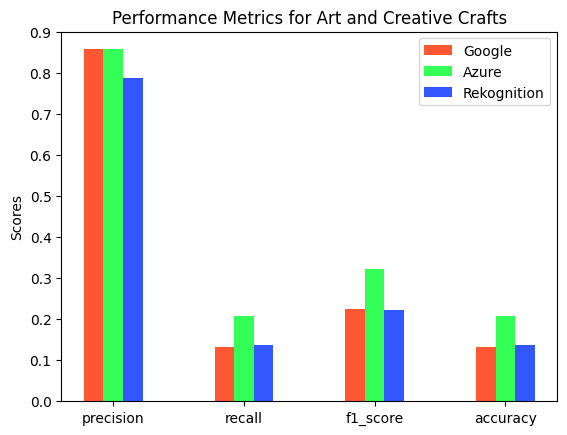

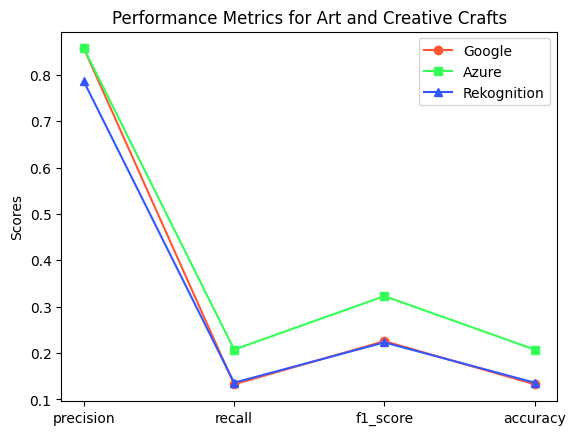

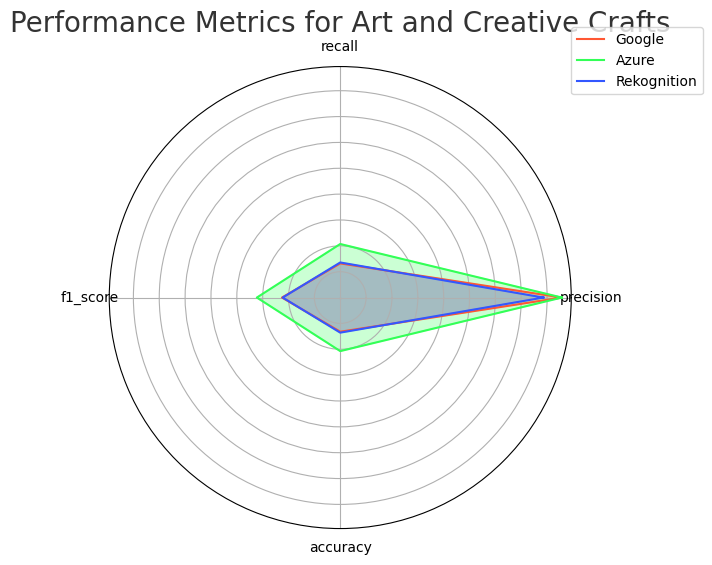

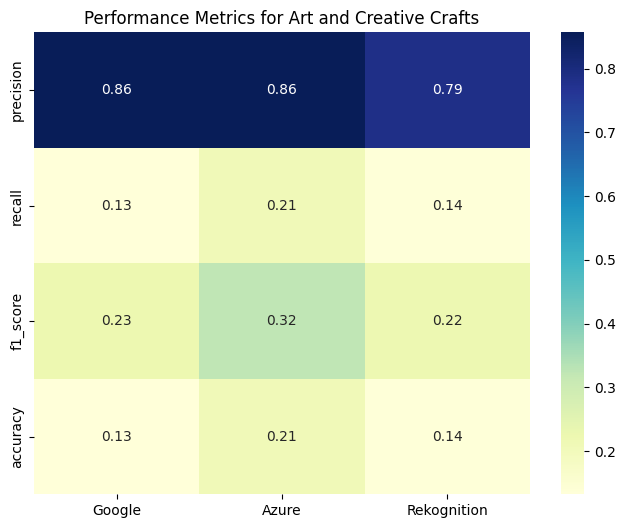

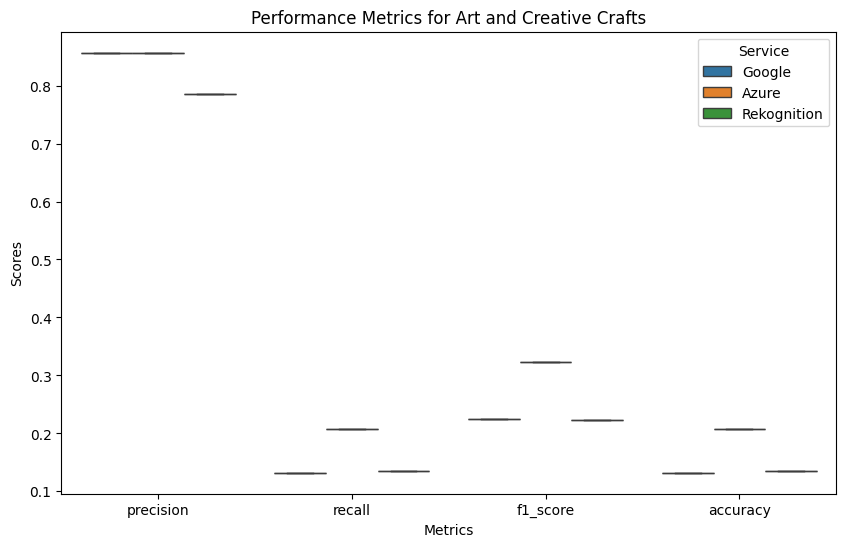

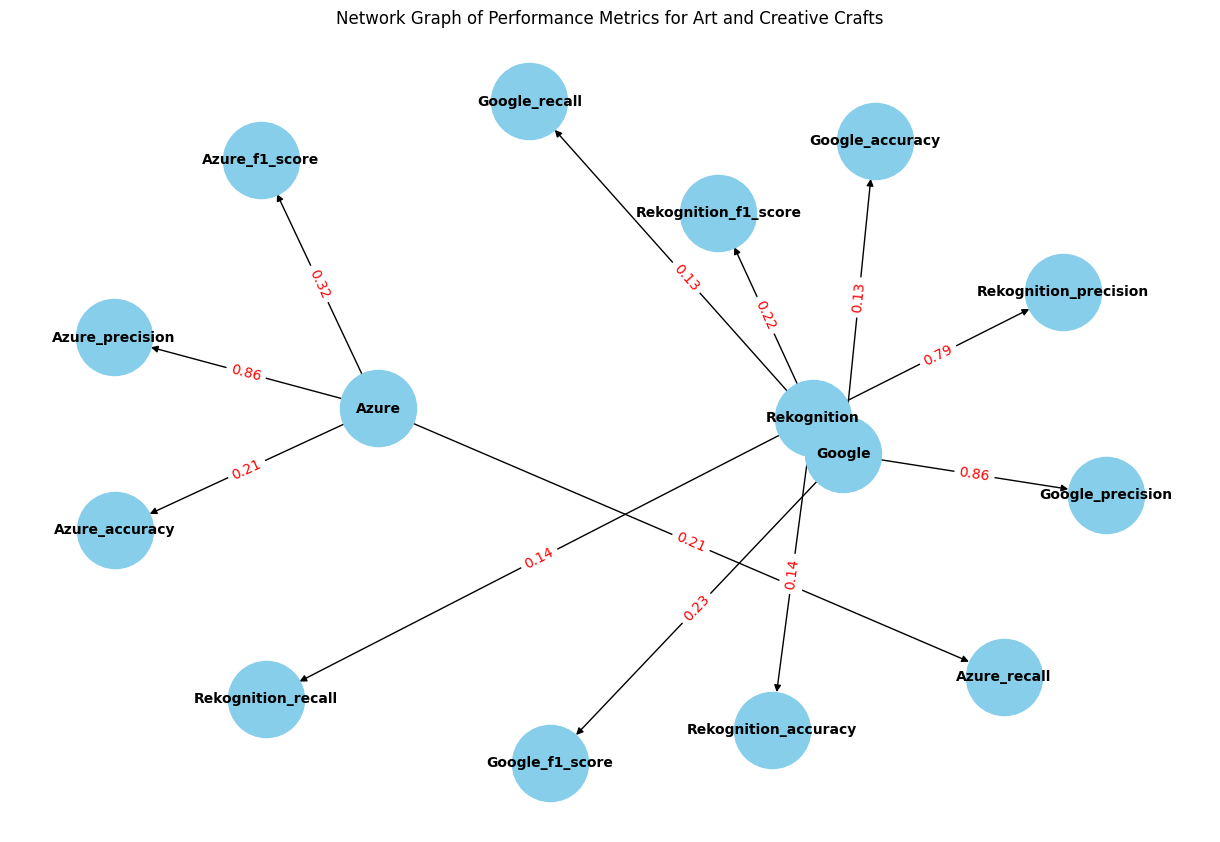

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your output
google_metrics = {'precision': 0.8571428571428571, 'recall': 0.13214285714285717, 'f1_score': 0.22535797535797533, 'accuracy': 0.13214285714285717}
azure_metrics = {'precision': 0.8571428571428571, 'recall': 0.2071428571428571, 'f1_score': 0.3225346082488939, 'accuracy': 0.2071428571428571}
rekognition_metrics = {'precision': 0.7857142857142857, 'recall': 0.1357142857142857, 'f1_score': 0.2226107226107226, 'accuracy': 0.1357142857142857}

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create bar plots
def create_bar_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, data[0], width, label='Google', color='#FF5733')   # Bright orange
    rects2 = ax.bar(x, data[1], width, label='Azure', color='#33FF57')  # Bright green
    rects3 = ax.bar(x + width, data[2], width, label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_bar_plot([google_data, azure_data, rekognition_data], metrics, 'Performance Metrics for Art and Creative Crafts')

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create line plots
def create_line_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations

    fig, ax = plt.subplots()
    ax.plot(x, data[0], marker='o', label='Google', color='#FF5733')   # Bright orange
    ax.plot(x, data[1], marker='s', label='Azure', color='#33FF57')  # Bright green
    ax.plot(x, data[2], marker='^', label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_line_plot([google_data, azure_data, rekognition_data], metrics, 'Performance Metrics for Art and Creative Crafts')

import matplotlib.pyplot as plt
import numpy as np

# Data preparation
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create radar charts
def create_radar_chart(data, labels, title):
    # Number of variables we're plotting.
    num_vars = len(labels)

    # Split the circle into even parts and save the angles
    # so we know where to put each axis.
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop"
    # and append the start to the end.
    data = [d + [d[0]] for d in data]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, data[0], color='#FF5733', alpha=0.25)
    ax.fill(angles, data[1], color='#33FF57', alpha=0.25)
    ax.fill(angles, data[2], color='#3357FF', alpha=0.25)

    ax.plot(angles, data[0], color='#FF5733', label='Google')
    ax.plot(angles, data[1], color='#33FF57', label='Azure')
    ax.plot(angles, data[2], color='#3357FF', label='Rekognition')

    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.set_title(title, size=20, color='#333')

    plt.show()

# Plot the data
create_radar_chart([google_data, azure_data, rekognition_data], metrics, 'Performance Metrics for Art and Creative Crafts')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
data = {
    'Google': google_data,
    'Azure': azure_data,
    'Rekognition': rekognition_data
}

# Create a dataframe for heatmap
df = pd.DataFrame(data, index=metrics)

# Function to create heatmap
def create_heatmap(df, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(df, annot=True, cmap="YlGnBu", cbar=True)
    plt.title(title)
    plt.show()

# Plot the data
create_heatmap(df, 'Performance Metrics for Art and Creative Crafts')

import matplotlib.pyplot as plt
import pandas as pd

# Data preparation
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
data = {
    'Metrics': metrics * 3,
    'Scores': google_data + azure_data + rekognition_data,
    'Service': ['Google'] * 4 + ['Azure'] * 4 + ['Rekognition'] * 4
}

# Create a dataframe
df = pd.DataFrame(data)

# Function to create box plots
def create_box_plot(df, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Metrics', y='Scores', hue='Service', data=df)
    plt.title(title)
    plt.show()

# Plot the data
create_box_plot(df, 'Performance Metrics for Art and Creative Crafts')

import networkx as nx
import matplotlib.pyplot as plt

# Data preparation
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
services = ['Google', 'Azure', 'Rekognition']
data = {
    'Google': google_data,
    'Azure': azure_data,
    'Rekognition': rekognition_data
}

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for service in services:
    for metric in metrics:
        G.add_node(f"{service}_{metric}")

# Add edges with weights
for service, values in data.items():
    for metric, value in zip(metrics, values):
        G.add_edge(service, f"{service}_{metric}", weight=value)

# Position nodes using spring layout
pos = nx.spring_layout(G)

# Draw nodes and edges
plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_weight='bold')

# Draw edge labels
edge_labels = {(service, f"{service}_{metric}"): round(value, 2)
               for service, values in data.items()
               for metric, value in zip(metrics, values)}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')
plt.title('Network Graph of Performance Metrics for Art and Creative Crafts')
plt.show()


Google Cloud Vision Metrics:
{'precision': 0.1, 'recall': 0.025, 'f1_score': 0.04, 'accuracy': 0.025}

Microsoft Azure Metrics:
{'precision': 0.65, 'recall': 0.19666666666666666, 'f1_score': 0.29690476190476195, 'accuracy': 0.19666666666666666}

Amazon Rekognition Metrics:
{'precision': 0.55, 'recall': 0.15499999999999997, 'f1_score': 0.23857142857142857, 'accuracy': 0.15499999999999997}


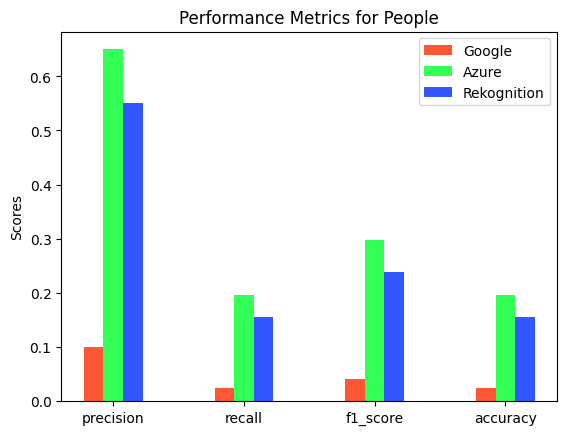

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your output
google_metrics = {'precision': 0.1, 'recall': 0.025, 'f1_score': 0.04, 'accuracy': 0.025}
azure_metrics = {'precision': 0.65, 'recall': 0.19666666666666666, 'f1_score': 0.29690476190476195, 'accuracy': 0.19666666666666666}
rekognition_metrics = {'precision': 0.55, 'recall': 0.15499999999999997, 'f1_score': 0.23857142857142857, 'accuracy': 0.15499999999999997}

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create bar plots
def create_bar_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, data[0], width, label='Google', color='#FF5733')   # Bright orange
    rects2 = ax.bar(x, data[1], width, label='Azure', color='#33FF57')  # Bright green
    rects3 = ax.bar(x + width, data[2], width, label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_bar_plot([google_data, azure_data, rekognition_data], metrics, 'Performance Metrics for People')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your output
google_metrics = {'precision': 0.8571428571428571, 'recall': 0.13214285714285717, 'f1_score': 0.22535797535797533, 'accuracy': 0.13214285714285717}
azure_metrics = {'precision': 0.8571428571428571, 'recall': 0.2071428571428571, 'f1_score': 0.3225346082488939, 'accuracy': 0.2071428571428571}
rekognition_metrics = {'precision': 0.7857142857142857, 'recall': 0.1357142857142857, 'f1_score': 0.2226107226107226, 'accuracy': 0.1357142857142857}

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create bar plots
def create_bar_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, data[0], width, label='Google', color='#FF5733')   # Bright orange
    rects2 = ax.bar(x, data[1], width, label='Azure', color='#33FF57')  # Bright green
    rects3 = ax.bar(x + width, data[2], width, label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_bar_plot([google_data, azure_data, rekognition_data], metrics, 'Performance Metrics for People')


In [1]:
#culture and historic context

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the controlled vocabularies and generated tags
controlled_vocab = {
    'americans_on_moon': ['moon landing', 'americans', 'space', 'history', 'achievement', 'nasa', '1969'],
    'carnival_yasuyoshi_chiba': ['carnival', 'yasuyoshi chiba', 'festival', 'culture', 'celebration', 'parade', 'brazil'],
    'christ_statue_brazil': ['christ the redeemer', 'brazil', 'statue', 'landmark', 'iconic', 'religious', 'historical'],
    'colosseum': ['colosseum', 'rome', 'history', 'landmark', 'ancient', 'architecture', 'heritage'],
    'eddie_adams_1968_saigon_execution': ['eddie adams', '1968', 'saigon', 'execution', 'war', 'vietnam', 'photography', 'history'],
    'egypt_sphinx': ['sphinx', 'egypt', 'landmark', 'ancient', 'history', 'archaeology', 'heritage'],
    'eiffel_tower_under_construction': ['eiffel tower', 'construction', 'history', 'architecture', 'landmark', 'paris'],
    'festival_dance_group': ['festival', 'dance group', 'culture', 'performance', 'traditional', 'celebration'],
    'festival_of_dead': ['festival of the dead', 'celebration', 'culture', 'tradition', 'dia de los muertos', 'mexico'],
    'gandhi_spinning_wheel': ['gandhi', 'spinning wheel', 'history', 'india', 'independence', 'iconic', 'photography'],
    'golden_bridge_vietnam': ['golden bridge', 'vietnam', 'landmark', 'architecture', 'tourism', 'modern', 'scenic'],
    'holi_festival_india': ['holi festival', 'india', 'celebration', 'culture', 'tradition', 'color', 'festival'],
    'newyork_city_workers': ['new york city', 'workers', 'history', 'iconic', 'photography', 'construction', '1930s'],
    'old_artefact_2': ['old artefact', 'history', 'ancient', 'culture', 'archaeology', 'heritage'],
    'old_artefact': ['old artefact', 'history', 'ancient', 'culture', 'archaeology', 'heritage'],
    'pyramids_getty': ['pyramids', 'egypt', 'landmark', 'history', 'ancient', 'archaeology', 'heritage'],
    'south_america_machu_picchu_peru': ['machu picchu', 'peru', 'landmark', 'history', 'ancient', 'archaeology', 'heritage'],
    'sphinx': ['sphinx', 'egypt', 'landmark', 'history', 'ancient', 'archaeology', 'heritage'],
    'taj_mahal': ['taj mahal', 'india', 'landmark', 'history', 'architecture', 'iconic', 'heritage'],
    'the_last_supper': ['the last supper', 'leonardo da vinci', 'art', 'painting', 'history', 'masterpiece', 'renaissance'],
    'tiananmen_square_tank': ['tiananmen square', 'tank', 'protest', 'history', 'iconic', 'photography', '1989'],
    'tomorrowland_1': ['tomorrowland', 'festival', 'music', 'culture', 'celebration', 'event'],
    'tower_bridge_london': ['tower bridge', 'london', 'landmark', 'architecture', 'iconic', 'history'],
    'wall_of_china': ['great wall of china', 'landmark', 'history', 'ancient', 'architecture', 'heritage'],
    'world_war_2': ['world war 2', 'history', 'soldiers', 'tanks', 'war', 'conflict', '194'],
}

google_tags = {
    'americans_on_moon': ['flag', 'astronaut', 'cargo pants', 'flag of the united states', 'military uniform', 'moon', 'military person', 'marines', 'soldier', 'astronomical object'],
    'carnival_yasuyoshi_chiba': ['light', 'lighting', 'landmark', 'fun', 'city', 'event', 'entertainment', 'leisure', 'crowd', 'fan'],
    'christ_statue_brazil': ['mountain', 'sky', 'world', 'azure', 'natural landscape', 'highland', 'sculpture', 'tree', 'statue', 'landscape'],
    'colosseum': ['cloud', 'sky', 'plant', 'building', 'tree', 'facade', 'city', 'landscape', 'column', 'monument'],
    'eddie_adams_1968_saigon_execution': ['white', 'black', 'tartan', 'building', 'black-and-white', 'gesture', 'style', 'window', 'plaid', 'monochrome photography'],
    'egypt_sphinx': ['sky', 'cloud', 'sculpture', 'landscape', 'building material', 'pyramid', 'monument', 'wonders of the world', 'archaeological site', 'art'],
    'eiffel_tower_under_construction': ['sky', 'architecture', 'cloud', 'building', 'tree', 'landmark', 'metropolis', 'city', 'monument', 'tower'],
    'festival_dance_group': ['clothing', 'face', 'head', 'eye', 'photograph', 'organ', 'entertainment', 'human', 'human body', 'performing arts'],
    'festival_of_dead': ['fashion', 'hat', 'headgear', 'entertainment', 'sun hat', 'event', 'eyewear', 'tradition', 'fun', 'sky'],
    'gandhi_spinning_wheel': ['black-and-white', 'style', 'tints and shades', 'automotive wheel system', 'spoke', 'monochrome photography', 'wheel', 'monochrome', 'hat', 'art'],
    'golden_bridge_vietnam': ['sky', 'plant', 'mountain', 'cloud', 'slope', 'natural landscape', 'tree', 'leisure', 'travel', 'landscape'],
    'holi_festival_india': ['sky', 'purple', 'cloud', 'happy', 'crowd', 'entertainment', 'leisure', 'fun', 'magenta', 'travel'],
    'newyork_city_workers': ['photograph', 'white', 'standing', 'hat', 'style', 'crew', 'monochrome', 'team', 'monochrome photography', 'crowd'],
    'old_artefact_2': ['vase', 'serveware', 'drinkware', 'pottery', 'artifact', 'earthenware', 'porcelain', 'art', 'dishware', 'ceramic'],
    'old_artefact': ['vase', 'drinkware', 'serveware', 'art', 'artifact', 'pottery', 'porcelain', 'earthenware', 'creative arts', 'sculpture'],
    'pyramids_getty': ['sky', 'cloud', 'ecoregion', 'pyramid', 'triangle', 'landscape', 'travel', 'monument', 'wonders of the world', 'aeolian landform'],
    'south_america_machu_picchu_peru': ['cloud', 'sky', 'mountain', 'world', 'natural landscape', 'highland', 'terrain', 'slope', 'wonders of the world', 'landscape'],
    'sphinx': ['photograph', 'sculpture', 'statue', 'art', 'landscape', 'travel', 'bedrock', 'formation', 'monochrome photography', 'sky'],
    'taj_mahal': ['sky', 'daytime', 'plant', 'nature', 'world', 'tree', 'architecture', 'building', 'grass', 'atmospheric phenomenon'],
    'the_last_supper': ['painting', 'art', 'wall', 'paint', 'drawing', 'visual arts', 'holy places', 'mural', 'history', 'illustration'],
    'tiananmen_square_tank': ['vehicle', 'combat vehicle', 'motor vehicle', 'self-propelled artillery', 'mode of transport', 'wheel', 'tank', 'soldier', 'army', 'military organization'],
    'tomorrowland_1': ['sky', 'atmosphere', 'cloud', 'world', 'fireworks', 'purple', 'lighting', 'entertainment', 'crowd', 'fan'],
    'tower_bridge_london': ['cloud', 'water', 'sky', 'blue', 'tower', 'morning', 'building', 'landmark', 'cityscape', 'suspension bridge'],
    'wall_of_china': ['cloud', 'sky', 'plant', 'mountain', 'building', 'landscape', 'wonders of the world', 'travel', 'archaeological site', 'grass'],
    'world_war_2': ['self-propelled artillery', 'tank', 'combat vehicle', 'vehicle', 'cloud', 'sky', 'mode of transport', 'motor vehicle', 'army', 'building'],
}

azure_tags = {
    'americans_on_moon': ['outdoor', 'clothing', 'ground', 'flag', 'person'],
    'carnival_yasuyoshi_chiba': ['festival', 'sky', 'outdoor', 'carnival', 'person', 'night'],
    'christ_statue_brazil': ['outdoor', 'mountain', 'sky', 'tree', 'hill station', 'landscape', 'tower'],
    'colosseum': ['building', 'sky', 'outdoor', 'cloud', 'landmark', 'tree', 'stadium', 'historic site', 'ancient roman architecture', 'ground', 'landscape', 'sunrise'],
    'eddie_adams_1968_saigon_execution': ['clothing', 'outdoor', 'person', 'human face', 'black and white', 'man', 'monochrome', 'street', 'style', 'road', 'people', 'city', 'ground'],
    'egypt_sphinx': ['building', 'sky', 'ancient history', 'pyramid', 'outdoor', 'historic site', 'history', 'monument', 'unesco world heritage site', 'archaeological site', 'wonders of the world', 'egyptian temple', 'desert', 'landmark', 'sand', 'ground'],
    'eiffel_tower_under_construction': ['building', 'sky', 'outdoor', 'black and white', 'tree', 'landmark', 'fog', 'bridge', 'city', 'tower'],
    'festival_dance_group': ['showgirl', 'carnival', 'dance', 'human face', 'entertainment', 'festival', 'mardi gras', 'dancer', 'samba', 'clothing', 'woman', 'person', 'dancing'],
    'festival_of_dead': ['parade', 'clothing', 'outdoor', 'woman', 'carnival', 'person', 'festival', 'smile', 'fashion accessory', 'costume', 'street', 'human face', 'sunglasses', 'people', 'city'],
    'gandhi_spinning_wheel': ['black and white', 'clothing', 'person', 'statue', 'man', 'sitting', 'ground', 'black', 'monochrome', 'indoor'],
    'golden_bridge_vietnam': ['outdoor', 'sky', 'plant', 'mountain', 'tree', 'cloud', 'landscape', 'grass', 'building', 'hill', 'nature', 'travel'],
    'holi_festival_india': ['sky', 'outdoor', 'cloud', 'crowd', 'person', 'clothing', 'human face', 'woman', 'festival', 'people', 'large', 'fiesta'],
    'newyork_city_workers': ['clothing', 'black and white', 'outdoor', 'group', 'person', 'man', 'crew', 'monochrome', 'people', 'standing'],
    'old_artefact_2': ['jar', 'vase', 'still life photography', 'urn', 'pottery', 'earthenware', 'art', 'wall', 'indoor', 'ceramic', 'museum'],
    'old_artefact': ['vase', 'jar', 'earthenware', 'pottery', 'urn', 'indoor', 'art', 'ceramic', 'plant', 'museum'],
    'pyramids_getty': ['building', 'sky', 'pyramid', 'outdoor', 'ancient history', 'unesco world heritage site', 'wonders of the world', 'historic site', 'sand', 'desert', 'archaeological site', 'history', 'landmark', 'ground'],
    'south_america_machu_picchu_peru': ['outdoor', 'landscape', 'cloud', 'sky', 'highland', 'mountain range', 'nature', 'ridge', 'hill station', 'massif', 'valley', 'summit', 'grass', 'mountain'],
    'sphinx': ['outdoor', 'sky', 'building', 'mountain', 'people', 'ground', 'pyramid'],
    'taj_mahal': ['building', 'sky', 'outdoor', 'tree', 'reflecting pool', 'landmark', 'dome', 'water', 'plant', 'grass', 'place of worship', 'temple'],
    'the_last_supper': ['painting', 'art', 'person', 'wall', 'indoor', 'museum'],
    'tiananmen_square_tank': ['vehicle', 'military vehicle', 'land vehicle', 'outdoor', 'wheel', 'road', 'transport', 'combat vehicle', 'weapon', 'self-propelled artillery', 'tire', 'gun turret', 'military organization', 'street', 'tank', 'military', 'army'],
    'tomorrowland_1': ['sky', 'outdoor', 'concert', 'fireworks', 'cloud', 'city'],
    'tower_bridge_london': ['outdoor', 'sky', 'water', 'cloud', 'building', 'suspension bridge', 'moveable bridge', 'drawbridge', 'cable-stayed bridge', 'waterway', 'girder bridge', 'landmark', 'tower', 'city', 'blue', 'river', 'large', 'bridge'],
    'wall_of_china': ['outdoor', 'cloud', 'sky', 'building', 'ruins', 'fortification', 'stone', 'mountain', 'plant', 'wall', 'stone wall', 'landscape', 'grass', 'fortress', 'castle'],
    'world_war_2': ['weapon', 'sky', 'vehicle', 'combat vehicle', 'self-propelled artillery', 'outdoor', 'wheel', 'gun turret', 'land vehicle', 'military vehicle', 'tank', 'military', 'mortar'],
}

rekognition_tags = {
    'americans_on_moon': ['aircraft', 'airplane', 'landing', 'glove', 'baby', 'person', 'american flag', 'flag', 'astronomy', 'outer space'],
    'carnival_yasuyoshi_chiba': ['carnival', 'adult', 'bride', 'female', 'person', 'woman', 'face', 'head', 'dancing', 'festival'],
    'christ_statue_brazil': ['art', 'adult', 'male', 'man', 'person', 'sculpture', 'statue', 'landmark', 'building', 'tower'],
    'colosseum': ['colosseum', 'landmark', 'person', 'car', 'transportation', 'vehicle'],
    'eddie_adams_1968_saigon_execution': ['helmet', 'adult', 'male', 'man', 'person', 'mobile phone', 'gun', 'weapon', 'firearm', 'handgun'],
    'egypt_sphinx': ['landmark', 'the great sphinx', 'architecture', 'building', 'pyramid'],
    'eiffel_tower_under_construction': ['person', 'building', 'eiffel tower', 'landmark', 'tower', 'city', 'monastery', 'cityscape', 'metropolis', 'arch'],
    'festival_dance_group': ['carnival', 'dancing', 'person', 'adult', 'female', 'woman', 'bride', 'face', 'head', 'necklace'],
    'festival_of_dead': ['festival', 'adult', 'bride', 'female', 'person', 'woman', 'face', 'halloween', 'necklace', 'hat'],
    'gandhi_spinning_wheel': ['adult', 'male', 'man', 'person', 'face', 'head', 'wheel', 'glasses', 'beard', 'working out'],
    'golden_bridge_vietnam': ['vegetation', 'land', 'nature', 'outdoors', 'tree', 'woodland', 'bridge', 'road', 'aerial view', 'person'],
    'holi_festival_india': ['adult', 'female', 'person', 'woman', 'festival', 'holi', 'face', 'head'],
    'newyork_city_workers': ['city', 'person', 'adult', 'male', 'man', 'urban', 'shoe', 'hat', 'glove', 'metropolis'],
    'old_artefact_2': ['jar', 'pottery', 'vase', 'urn', 'beverage', 'coffee', 'coffee cup', 'cookware', 'pot', 'cup'],
    'old_artefact': ['jar', 'pottery', 'vase', 'adult', 'bride', 'female', 'person', 'woman', 'urn', 'cup'],
    'pyramids_getty': ['architecture', 'building', 'great pyramids of giza', 'landmark', 'pyramid', 'person', 'animal', 'horse', 'mammal'],
    'south_america_machu_picchu_peru': ['landmark', 'machu picchu'],
    'sphinx': ['helmet', 'landmark', 'the great sphinx', 'person', 'clothing', 'hat', 'accessories', 'bag', 'handbag'],
    'taj_mahal': ['building', 'arch', 'gothic arch', 'dome', 'outdoors', 'scenery', 'person', 'tomb', 'taj mahal', 'lighthouse'],
    'the_last_supper': ['art', 'painting', 'adult', 'female', 'person', 'woman', 'face', 'head', 'male', 'man'],
    'tiananmen_square_tank': ['war', 'baseball (ball)', 'person', 'armored', 'military', 'tank', 'vehicle', 'handbag', 'car', 'military base'],
    'tomorrowland_1': ['concert', 'crowd', 'person', 'fun', 'theme park', 'windmill', 'adult', 'male', 'man', 'balloon'],
    'tower_bridge_london': ['bridge', 'landmark', 'tower bridge', 'architecture', 'building', 'clock tower', 'tower', 'person'],
    'wall_of_china': ['great wall of china', 'landmark', 'architecture', 'building', 'castle', 'fortress'],
    'world_war_2': ['armored', 'military', 'tank', 'vehicle', 'weapon', 'person', 'wheel', 'car', 'truck', 'face'],
}

def calculate_metrics(controlled_vocab, tags_dict):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []

    for key in controlled_vocab.keys():
        # Convert both true and predicted tags to lowercase for case-insensitive comparison
        y_true = [1 if tag.lower() in [t.lower() for t in controlled_vocab[key]] else 0 for tag in controlled_vocab[key]]
        y_pred = [1 if tag.lower() in [t.lower() for t in tags_dict.get(key, [])] else 0 for tag in controlled_vocab[key]]

        precision_scores.append(precision_score(y_true, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_true, y_pred, zero_division=0))
        accuracy_scores.append(accuracy_score(y_true, y_pred))

    return {
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1_score': np.mean(f1_scores),
        'accuracy': np.mean(accuracy_scores)
    }

# Calculate metrics for each AI service
google_metrics = calculate_metrics(controlled_vocab, google_tags)
azure_metrics = calculate_metrics(controlled_vocab, azure_tags)
rekognition_metrics = calculate_metrics(controlled_vocab, rekognition_tags)

# Print the results
print("Google Cloud Vision Metrics:")
print(google_metrics)
print("\nMicrosoft Azure Metrics:")
print(azure_metrics)
print("\nAmazon Rekognition Metrics:")
print(rekognition_metrics)


Google Cloud Vision Metrics:
{'precision': 0.28, 'recall': 0.06095238095238095, 'f1_score': 0.09685714285714285, 'accuracy': 0.06095238095238095}

Microsoft Azure Metrics:
{'precision': 0.44, 'recall': 0.08857142857142856, 'f1_score': 0.14539682539682539, 'accuracy': 0.08857142857142856}

Amazon Rekognition Metrics:
{'precision': 0.56, 'recall': 0.14476190476190476, 'f1_score': 0.2222222222222222, 'accuracy': 0.14476190476190476}


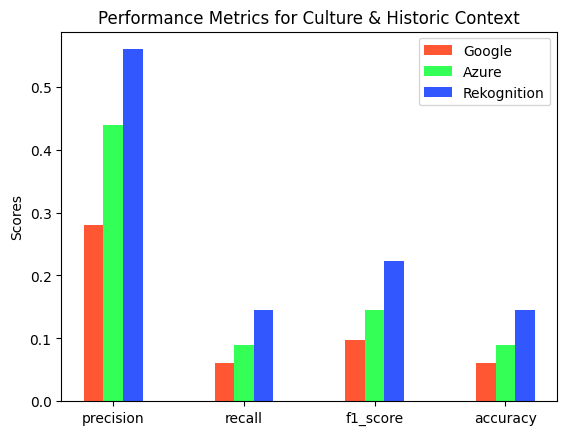

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your output
google_metrics = {'precision': 0.28, 'recall': 0.06095238095238095, 'f1_score': 0.09685714285714285, 'accuracy': 0.06095238095238095}
azure_metrics = {'precision': 0.44, 'recall': 0.08857142857142856, 'f1_score': 0.14539682539682539, 'accuracy': 0.08857142857142856}
rekognition_metrics = {'precision': 0.56, 'recall': 0.14476190476190476, 'f1_score': 0.2222222222222222, 'accuracy': 0.14476190476190476}

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create bar plots
def create_bar_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, data[0], width, label='Google', color='#FF5733')   # Bright orange
    rects2 = ax.bar(x, data[1], width, label='Azure', color='#33FF57')  # Bright green
    rects3 = ax.bar(x + width, data[2], width, label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_bar_plot([google_data, azure_data, rekognition_data], metrics, 'Performance Metrics for Culture & Historic Context')


In [4]:
#Daily life Scenes
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the controlled vocabularies and generated tags
controlled_vocab = {
    'bangor_graduation_21': ['graduation', 'students', 'academic', 'celebration', 'ceremony', 'caps and gowns', 'higher education'],
    'cooking_at_home': ['cooking', 'home', 'couple', 'kitchen', 'domestic', 'food preparation', 'togetherness'],
    'family_cooking_kitchen': ['cooking', 'family', 'kitchen', 'food preparation', 'togetherness', 'home', 'domestic'],
    'girl_with_shopping_bags': ['shopping', 'retail', 'bags', 'consumerism', 'fashion', 'outdoors', 'lifestyle'],
    'london_tube_rush_hour': ['commuting', 'rush hour', 'subway', 'crowded', 'public transport', 'urban', 'daily life'],
    'london_englanduk_covent_gardenmarketshopping_shopper': ['market', 'shopping', 'london', 'outdoor', 'retail', 'daily life', 'urban'],
    'musician_on_street_mixed_race': ['street musician', 'performance', 'outdoor', 'culture', 'art', 'mixed race', 'music'],
    'new_orleans_musicians_luisiana': ['musicians', 'street performance', 'new orleans', 'culture', 'music', 'outdoor', 'louisiana'],
    'office_workers': ['office', 'work', 'computers', 'professional', 'workspace', 'daily life', 'technology'],
    'office_workers_online_meeting': ['meeting', 'office', 'work', 'online', 'professional', 'technology', 'daily life'],
    'kids_in_class': ['classroom', 'kids', 'education', 'learning', 'school', 'students', 'technology'],
    'passengers_reading_books_and_newspapers_in_a_london_underground': ['commuting', 'reading', 'subway', 'books', 'newspapers', 'london', 'public transport'],
    'people_relaxing_outdoors': ['outdoors', 'relaxing', 'campus', 'students', 'socializing', 'university', 'green space'],
    'piccadilly_line_passengers_in_overcrowded_carriage': ['commuting', 'subway', 'overcrowded', 'public transport', 'london', 'daily life', 'urban'],
    'reading_a_book_on_tube': ['reading', 'subway', 'book', 'commuting', 'public transport', 'daily life', 'urban'],
    'school_playground': ['playground', 'kids', 'school', 'outdoor', 'play', 'education', 'recreation'],
    'street_musicians': ['street musicians', 'performance', 'outdoor', 'music', 'art', 'culture', 'daily life'],
    'teacher_in_class': ['classroom', 'teacher', 'education', 'learning', 'school', 'students', 'instruction'],
    'two_girls_shopping': ['shopping', 'retail', 'girls', 'consumerism', 'fashion', 'lifestyle', 'bags'],
    'vegetable_seller_africa': ['market', 'vegetables', 'seller', 'africa', 'outdoor', 'daily life', 'trade'],
    'vegetable_shopper': ['shopping', 'vegetables', 'grocery', 'market', 'produce', 'basket', 'retail', 'daily life'],
}

google_tags = {
    'bangor_graduation_21': ['outerwear', 'smile', 'black', 'mortarboard', 'scholar', 'academic dress', 'graduation', 'gesture', 'sleeve', 'headgear'],
    'cooking_at_home': ['smile', 'cooking', 'food', 'kitchen appliance', 'recipe', 'home appliance', 'tableware', 'kitchen', 'countertop', 'beard'],
    'family_cooking_kitchen': ['food', 'tableware', 'table', 'sharing', 'window', 'recipe', 'mixing bowl', 'happy', 'plate', 'smile'],
    'girl_with_shopping_bags': ['glasses', 'vision care', 'goggles', 'sunglasses', 'fashion', 'gesture', 'eyewear', 'microphone', 'plant', 'beauty'],
    'kids_in_class': ['blue', 'sharing', 'television set', 'social group', 'leisure', 't-shirt', 'television', 'toddler', 'child', 'event'],
    'london_tube_rush_hour': ['train', 'vehicle', 'motor vehicle', 'rolling stock', 'hat', 'mode of transport', 'public transport', 'travel', 'jacket', 'passenger'],
    'london_englanduk_covent_gardenmarketshopping_shopper': ['photograph', 'temple', 'selling', 'shopping', 'leisure', 'market', 'travel', 'city', 'retail', 'fun'],
    'musician_on_street_mixed_race': ['musical instrument', 'shoe', 'musician', 'blue', 'guitar', 'hat', 'window', 'drum', 'string instrument', 'plucked string instruments'],
    'new_orleans_musicians_luisiana': ['musical instrument', 'drum', 'infrastructure', 'musician', 'building', 'folk instrument', 'string instrument', 'music', 'road', 'band plays'],
    'office_workers_online_meeting': ['table', 'computer', 'laptop', 'furniture', 'shirt', 'personal computer', 'chair', 'interior design', 'interaction', 'leisure'],
    'office_workers': ['computer', 'table', 'personal computer', 'furniture', 'computer monitor', 'computer desk', 'desk', 'computer keyboard', 'peripheral', 'desktop computer'],
    'passengers_reading_books_and_newspapers_in_a_london_underground': ['train', 'motor vehicle', 'mode of transport', 'automotive design', 'travel', 'hat', 'public transport', 'passenger', 'metropolitan area', 'event'],
    'people_relaxing_outdoors': ['cloud', 'plant', 'sky', 'window', 'nature', 'building', 'tree', 'grass', 'leisure', 'city'],
    'piccadilly_line_passengers_in_overcrowded_carriage': ['train', 'vehicle', 'mode of transport', 'travel', 'rolling stock', 'jacket', 'public transport', 'passenger', 'air travel', 'hat'],
    'reading_a_book_on_tube': ['train', 'mode of transport', 'travel', 'public transport', 'passenger', 'electric blue', 'motor vehicle', 'belt', 'vehicle door', 'job'],
    'school_playground': ['clothing', 'plant', 'tree', 'woody plant', 'leisure', 'shorts', 'recreation', 'city', 'fun', 'event'],
    'street_musicians': ['musical instrument', 'band plays', 'musician', 'drum', 'orange', 'microphone', 'performing arts', 'music', 'door', 'entertainment'],
    'teacher_in_class': ['table', 'chair', 'desk', 'engineering', 'teacher', 'leisure', 'event', 't-shirt', 'academic institution', 'art'],
    'two_girls_shopping': ['hand', 'outerwear', 'hairstyle', 'smile', 'hat', 'sleeve', 'textile', 'eyewear', 'standing', 'travel'],
    'vegetable_seller_africa': ['food', 'umbrella', 'selling', 'green', 'natural foods', 'sky', 'hawker', 'greengrocer', 'whole food', 'market'],
    'vegetable_shopper': ['food', 'selling', 'green', 'product', 'natural foods', 'greengrocer', 'whole food', 'ingredient', 'food group', 'retail'],
}

azure_tags = {
    'bangor_graduation_21': ['commencement', 'graduation', 'human face', 'person', 'scholar', 'academic dress', 'clothing', 'academic costume', 'mortarboard', 'college', 'smile', 'outdoor', 'university', 'diploma', 'student', 'academic institution', 'cloak', 'woman'],
    'cooking_at_home': ['person', 'clothing', 'indoor', 'kitchen appliance', 'wall', 'human face', 'home appliance', 'smile', 'countertop', 'appliance', 'kitchen', 'woman', 'standing', 'stove'],
    'family_cooking_kitchen': ['person', 'clothing', 'human face', 'tableware', 'bowl', 'food', 'indoor', 'wall', 'toddler', 'mixing bowl', 'boy', 'sharing', 'meal', 'woman', 'child', 'people', 'girl', 'kitchen', 'family'],
    'girl_with_shopping_bags': ['clothing', 'human face', 'fashion accessory', 'person', 'outdoor', 'glasses', 'accessory', 'handbag', 'goggles', 'eyewear', 'woman', 'sunglasses', 'fashion'],
    'kids_in_class': ['clothing', 'indoor', 'person', 'girl', 'boy', 'toddler', 'school', 'kindergarten', 'learning', 'human face', 'education', 'class', 'child', 'wall', 'group', 'room'],
    'london_tube_rush_hour': ['clothing', 'person', 'people', 'vehicle', 'man', 'passenger', 'group', 'jacket', 'outdoor', 'crowd', 'train', 'subway'],
    'london_englanduk_covent_gardenmarketshopping_shopper': ['clothing', 'scene', 'person', 'market', 'building', 'street', 'outdoor', 'man', 'trade', 'bazaar', 'footwear', 'shopping', 'retail', 'flea market', 'selling', 'shop', 'public space', 'marketplace', 'people', 'store', 'ground', 'standing', 'woman'],
    'musician_on_street_mixed_race': ['musical instrument', 'music', 'clothing', 'person', 'outdoor', 'drum', 'guitar', 'street performance', 'building', 'man', 'ground', 'string instrument', 'folk instrument', 'hat', 'people', 'sitting', 'group', 'street'],
    'new_orleans_musicians_luisiana': ['musical instrument', 'music', 'clothing', 'person', 'outdoor', 'street performance', 'building', 'street', 'man', 'footwear', 'road', 'cello', 'street artist', 'string instrument', 'drum', 'people', 'pedestrian', 'folk instrument', 'musician', 'city', 'group', 'standing'],
    'office_workers_online_meeting': ['clothing', 'furniture', 'person', 'indoor', 'office building', 'desk', 'laptop', 'window', 'chair', 'people', 'computer', 'sitting', 'table', 'wall', 'group', 'woman'],
    'office_workers': ['indoor', 'office building', 'clothing', 'person', 'computer monitor', 'personal computer', 'job', 'computer', 'computer desk', 'desktop computer', 'furniture', 'table', 'computer keyboard', 'output device', 'desk', 'computer network', 'wall', 'people', 'woman', 'office'],
    'passengers_reading_books_and_newspapers_in_a_london_underground': ['clothing', 'person', 'man', 'passenger', 'newspaper', 'public transport', 'text', 'people', 'sitting', 'subway', 'train'],
    'people_relaxing_outdoors': ['outdoor', 'grass', 'cloud', 'sky', 'tree', 'building', 'plant', 'campus', 'park', 'people', 'estate', 'university', 'person', 'lawn', 'house', 'sitting', 'group', 'summer', 'large'],
    'piccadilly_line_passengers_in_overcrowded_carriage': ['clothing', 'person', 'passenger', 'man', 'human face', 'people', 'group', 'train', 'subway', 'indoor'],
    'reading_a_book_on_tube': ['clothing', 'person', 'passenger', 'public transport', 'vehicle', 'woman', 'train', 'subway', 'blue', 'indoor'],
    'school_playground': ['outdoor', 'tree', 'footwear', 'playground', 'clothing', 'person', 'public space', 'land vehicle', 'people', 'street'],
    'street_musicians': ['musical instrument', 'building', 'person', 'bowed instrument', 'music', 'clothing', 'violin family', 'bowed string instrument', 'string instrument', 'violin', 'outdoor', 'classical music', 'footwear', 'street performance', 'ground', 'cello', 'standing', 'people', 'woman', 'street'],
    'teacher_in_class': ['clothing', 'indoor', 'person', 'table', 'furniture', 'wall', 'education', 'whiteboard', 'learning', 'classroom', 'class', 'desk', 'footwear', 'school', 'course', 'chair', 'teacher', 'people', 'group'],
    'two_girls_shopping': ['fashion accessory', 'clothing', 'hat', 'person', 'human face', 'sun hat', 'outdoor', 'handbag', 'street fashion', 'sky', 'fashion', 'fedora', 'smile', 'girl', 'woman', 'standing', 'street'],
    'vegetable_seller_africa': ['scene', 'person', 'marketplace', 'market', 'local food', 'outdoor', 'selling', 'trade', 'greengrocer', 'clothing', 'whole food', 'natural foods', 'bazaar', 'grocer', 'flea market', 'food group', 'vegan nutrition', 'vegetable', 'people', 'standing', 'produce', 'food'],
    'vegetable_shopper': ['natural foods', 'whole food', 'local food', 'greengrocer', 'diet food', 'food group', 'vegan nutrition', 'person', 'trade', 'selling', 'market', 'fruit', 'superfood', 'food', 'grocer', 'clothing', 'grocery store', 'shopkeeper', 'retail', 'apple', 'produce', 'outdoor', 'standing', 'woman', 'vegetable', 'marketplace', 'fresh', 'sale'],
}

rekognition_tags = {
    'bangor_graduation_21': ['people', 'person', 'coat', 'adult', 'male', 'man', 'female', 'woman', 'student', 'graduation'],
    'cooking_at_home': ['adult', 'male', 'man', 'person', 'female', 'woman', 'cookware', 'plant', 'cooking pot', 'stirring food'],
    'family_cooking_kitchen': ['cooking', 'food', 'stirring food', 'child', 'female', 'girl', 'person', 'cooking pot', 'pot', 'cooktop'],
    'girl_with_shopping_bags': ['person', 'shopping', 'adult', 'female', 'woman', 'bag', 'face', 'head', 'shopping bag', 'accessories'],
    'kids_in_class': ['child', 'female', 'girl', 'person', 'boy', 'male', 'monitor', 'student', 'handbag', 'kindergarten'],
    'london_tube_rush_hour': ['people', 'person', 'adult', 'male', 'man', 'boarding', 'boy', 'child', 'female', 'woman'],
    'london_englanduk_covent_gardenmarketshopping_shopper': ['kiosk', 'shorts', 'path', 'city', 'adult', 'male', 'man', 'person', 'child', 'girl'],
    'musician_on_street_mixed_race': ['adult', 'male', 'man', 'person', 'guitar', 'chair', 'shoe', 'music band', 'musician', 'performer'],
    'new_orleans_musicians_luisiana': ['adult', 'female', 'person', 'woman', 'group performance', 'music band', 'male', 'man', 'city', 'guitar'],
    'office_workers_online_meeting': ['adult', 'female', 'person', 'woman', 'laptop', 'chair', 'monitor', 'mobile phone', 'conversation', 'shoe'],
    'office_workers': ['adult', 'male', 'man', 'person', 'table', 'mobile phone', 'laptop', 'female', 'woman', 'pen'],
    'passengers_reading_books_and_newspapers_in_a_london_underground': ['terminal', 'person', 'reading', 'people', 'adult', 'female', 'woman', 'male', 'man', 'jeans'],
    'people_relaxing_outdoors': ['architecture', 'building', 'college', 'person', 'housing', 'house'],
    'piccadilly_line_passengers_in_overcrowded_carriage': ['people', 'person', 'adult', 'male', 'man', 'female', 'woman', 'face', 'terminal', 'jacket'],
    'reading_a_book_on_tube': ['person', 'reading', 'adult', 'female', 'woman', 'pants', 'head', 'railway', 'train', 'terminal'],
    'school_playground': ['play area', 'outdoor play area', 'outdoors', 'people', 'person', 'child', 'female', 'girl', 'car', 'shoe'],
    'street_musicians': ['adult', 'female', 'person', 'woman', 'mailbox', 'coat', 'music', 'musical instrument', 'musician', 'performer'],
    'teacher_in_class': ['school', 'adult', 'female', 'person', 'woman', 'girl', 'teen', 'classroom', 'boy', 'child'],
    'two_girls_shopping': ['person', 'shopping', 'face', 'happy', 'head', 'laughing', 'adult', 'female', 'woman', 'handbag'],
    'vegetable_seller_africa': ['adult', 'male', 'man', 'person', 'female', 'woman', 'jeans', 'market', "farmer's market", 'face'],
    'vegetable_shopper': ['adult', 'female', 'person', 'woman', 'market', 'indoors', 'shop', 'grocery store', 'supermarket', 'produce'],
}

def calculate_metrics(controlled_vocab, tags_dict):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []

    for key in controlled_vocab.keys():
        # Convert both true and predicted tags to lowercase for case-insensitive comparison
        y_true = [1 if tag.lower() in [t.lower() for t in controlled_vocab[key]] else 0 for tag in controlled_vocab[key]]
        y_pred = [1 if tag.lower() in [t.lower() for t in tags_dict.get(key, [])] else 0 for tag in controlled_vocab[key]]

        precision_scores.append(precision_score(y_true, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_true, y_pred, zero_division=0))
        accuracy_scores.append(accuracy_score(y_true, y_pred))

    return {
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1_score': np.mean(f1_scores),
        'accuracy': np.mean(accuracy_scores)
    }

# Calculate metrics for each AI service
google_metrics = calculate_metrics(controlled_vocab, google_tags)
azure_metrics = calculate_metrics(controlled_vocab, azure_tags)
rekognition_metrics = calculate_metrics(controlled_vocab, rekognition_tags)

# Print the results
print("Google Cloud Vision Metrics:")
print(google_metrics)
print("\nMicrosoft Azure Metrics:")
print(azure_metrics)
print("\nAmazon Rekognition Metrics:")
print(rekognition_metrics)


Google Cloud Vision Metrics:
{'precision': 0.6666666666666666, 'recall': 0.11479591836734693, 'f1_score': 0.19126984126984126, 'accuracy': 0.11479591836734693}

Microsoft Azure Metrics:
{'precision': 0.9523809523809523, 'recall': 0.28316326530612246, 'f1_score': 0.41748436748436746, 'accuracy': 0.28316326530612246}

Amazon Rekognition Metrics:
{'precision': 0.47619047619047616, 'recall': 0.07993197278911564, 'f1_score': 0.13544973544973546, 'accuracy': 0.07993197278911564}


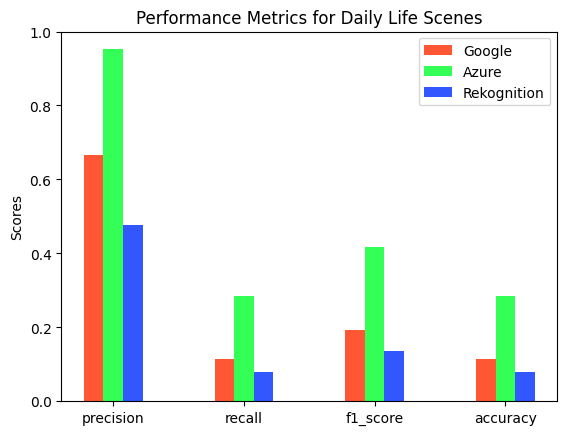

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your output
google_metrics = {'precision': 0.6666666666666666, 'recall': 0.11479591836734693, 'f1_score': 0.19126984126984126, 'accuracy': 0.11479591836734693}
azure_metrics = {'precision': 0.9523809523809523, 'recall': 0.28316326530612246, 'f1_score': 0.41748436748436746, 'accuracy': 0.28316326530612246}
rekognition_metrics = {'precision': 0.47619047619047616, 'recall': 0.07993197278911564, 'f1_score': 0.13544973544973546, 'accuracy': 0.07993197278911564}

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create bar plots
def create_bar_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, data[0], width, label='Google', color='#FF5733')   # Bright orange
    rects2 = ax.bar(x, data[1], width, label='Azure', color='#33FF57')  # Bright green
    rects3 = ax.bar(x + width, data[2], width, label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_bar_plot([google_data, azure_data, rekognition_data], metrics, 'Performance Metrics for Daily Life Scenes')


In [5]:
#Nature
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the controlled vocabularies and generated tags
controlled_vocab = {
    'colorful_flowers': ['flowers', 'garden', 'colorful blooms', 'horticulture', 'floral diversity', 'nature\'s beauty'],
    'amazon_rainforest': ['Amazon', 'rainforest', 'jungle', 'biodiversity', 'tropical', 'greenery'],
    'animals': ['wildlife', 'safari', 'nature', 'fauna', 'Africa', 'ecosystem'],
    'argentina_glaciers': ['glaciers', 'ice', 'nature', 'Argentina', 'cold', 'landscape'],
    'baltoro_glacier': ['glacier', 'mountains', 'cold', 'nature', 'landscape', 'rugged'],
    'beach_sunset': ['beach', 'sunset', 'nature', 'ocean', 'scenic', 'tranquility'],
    'beach': ['beach', 'sea', 'sand', 'nature', 'vacation', 'coast'],
    'cactus': ['cactus', 'desert', 'plant', 'nature', 'arid', 'spiky'],
    'cononaco_river_amazon_rainforest': ['river', 'Amazon', 'rainforest', 'waterway', 'nature', 'tropical'],
    'dream_summer_sunny_day': ['flowers', 'field', 'nature', 'sunrise', 'blooms', 'summer'],
    'elephant_family': ['elephant', 'wildlife', 'animals', 'nature', 'family', 'safari'],
    'flock_of_birds': ['birds', 'flock', 'cityscape', 'nature', 'wildlife', 'urban'],
    'flowers': ['flowers', 'garden', 'bloom', 'nature', 'floral', 'horticulture'],
    'flower_plants': ['flower', 'plants', 'nature', 'horticulture', 'bloom', 'garden'],
    'forest': ['forest', 'nature', 'greenery', 'landscape', 'waterfall', 'wilderness'],
    'green_bud': ['green', 'bud', 'plant', 'nature', 'bloom', 'horticulture'],
    'hurricane': ['hurricane', 'storm', 'nature', 'weather', 'ocean', 'satellite image'],
    'london_pet_dogs': ['dogs', 'pets', 'London', 'urban', 'animals', 'bridge'],
    'oasis': ['oasis', 'desert', 'nature', 'water', 'landscape', 'vegetation'],
    'desert_flower': ['flower', 'desert', 'nature', 'bloom', 'horticulture', 'flora'],
    'sahara_desert': ['desert', 'Sahara', 'sand dunes', 'nature', 'landscape', 'arid'],
    'rainy_street': ['rain', 'street', 'urban', 'nature', 'weather', 'cityscape'],
    'thunderstorm': ['thunderstorm', 'lightning', 'nature', 'weather', 'storm', 'sky'],
    'uk_beach': ['beach', 'coastline', 'nature', 'water', 'seaside', 'landscape'],
    'zebras': ['zebras', 'wildlife', 'animals', 'nature', 'safari', 'plains'],
    'mountain_landscape': ['mountain', 'landscape', 'nature', 'sunrise', 'flowers', 'scenic'],
}


google_tags = {
    'amazon_rainforest': ['water', 'water resources', 'ecoregion', 'natural landscape', 'fluvial landforms of streams', 'natural environment', 'vegetation', 'watercourse', 'biome', 'lake'],
    'animals': ['sky', 'plant community', 'ecoregion', 'vertebrate', 'zebra', 'natural environment', 'tree', 'neck', 'natural landscape', 'plant'],
    'argentina_glaciers': ['water', 'water resources', 'sky', 'cloud', 'snow', 'natural landscape', 'mountain', 'ice cap', 'freezing', 'polar ice cap'],
    'baltoro_glacier': ['sky', 'mountain', 'snow', 'natural landscape', 'slope', 'glacial landform', 'mountainous landforms', 'landscape', 'geological phenomenon', 'ice cap'],
    'beach_sunset_1': ['water', 'sky', 'ecoregion', 'light', 'afterglow', 'nature', 'dusk', 'orange', 'sunlight', 'sunset'],
    'beach_sunset': ['water', 'cloud', 'sky', 'atmosphere', 'water resources', 'daytime', 'afterglow', 'azure', 'nature', 'natural landscape'],
    'beach': ['water', 'sky', 'azure', 'blue', 'tree', 'beach', 'plant', 'arecales', 'shade', 'outdoor furniture'],
    'cactus': ['plant', 'houseplant', 'terrestrial plant', 'organism', 'vegetation', 'groundcover', 'flowerpot', 'flowering plant', 'landscape', 'annual plant'],
    'colorful_flowers': ['flower', 'plant', 'petal', 'botany', 'red', 'groundcover', 'flowering plant', 'magenta', 'annual plant', 'close-up'],
    'cononaco_river_amazon_rainforest': ['water', 'water resources', 'natural landscape', 'oxbow lake', 'river delta', 'vegetation', 'fluvial landforms of streams', 'landscape', 'terrestrial plant', 'urban design'],
    'dream_summer_sunny_day': ['flower', 'plant', 'sky', 'ecoregion', 'people in nature', 'light', 'nature', 'natural environment', 'petal', 'grass'],
    'elephant_family': ['plant', 'plant community', 'vertebrate', 'ecoregion', 'elephant', 'natural landscape', 'working animal', 'elephants and mammoths', 'african elephant', 'grass'],
    'flock_of_birds': ['bird', 'water', 'building', 'sky', 'cloud', 'skyscraper', 'beak', 'wing', 'waterfowl', 'city'],
    'flower_1': ['flower', 'plant', 'petal', 'botany', 'purple', 'terrestrial plant', 'pink', 'groundcover', 'flowering plant', 'herbaceous plant'],
    'flower_plants': ['flower', 'plant', 'photograph', 'white', 'petal', 'botany', 'blue', 'purple', 'nature', 'yellow'],
    'forest_1': ['water', 'water resources', 'mountain', 'plant', 'sky', 'cloud', 'green', 'natural landscape', 'natural environment', 'highland'],
    'green_bud': ['flower', 'plant', 'leaf', 'petal', 'botany', 'terrestrial plant', 'groundcover', 'shrub', 'herbaceous plant', 'annual plant'],
    'katrina': ['water', 'tropical cyclone', 'cloud', 'sky', 'world', 'cyclone', 'astronomical object', 'liquid', 'wind wave', 'space'],
    'london_pet_dogs': ['sky', 'cloud', 'tree', 'working animal', 'fawn', 'leisure', 'carnivore', 'travel', 'wood', 'companion dog'],
    'oasis': ['cloud', 'sky', 'plant', 'water', 'plant community', 'natural landscape', 'tree', 'oasis', 'mountain', 'plain'],
    'planter': ['plant', 'flowerpot', 'houseplant', 'terrestrial plant', 'tree', 'grass', 'flowering plant', 'herbaceous plant', 'wood', 'room'],
    'pollen_flower': ['flower', 'petal', 'terrestrial plant', 'plant', 'flowering plant', 'herbaceous plant', 'pedicel', 'sky', 'pittosporaceae', 'lily family'],
    'sahara': ['sky', 'natural landscape', 'biome', 'terrain', 'landscape', 'horizon', 'tints and shades', 'slope', 'aeolian landform', 'erg'],
    'street': ['water', 'sky', 'automotive lighting', 'nature', 'vehicle', 'car', 'window', 'road surface', 'mode of transport', 'morning'],
    'thunderstorm': ['lightning', 'sky', 'thunder', 'atmosphere', 'cloud', 'thunderstorm', 'light', 'nature', 'electricity', 'atmospheric phenomenon'],
    'uk_beach': ['water', 'sky', 'water resources', 'beach', 'cloud', 'natural landscape', 'sunlight', 'coastal and oceanic landforms', 'wood', 'watercourse'],
    'zebras': ['plant', 'plant community', 'vertebrate', 'ecoregion', 'natural environment', 'tree', 'neck', 'natural landscape', 'mammal', 'grass'],
    'zugpsitze_mountain': ['flower', 'plant', 'mountain', 'water', 'sky', 'ecoregion', 'natural landscape', 'nature', 'highland', 'vegetation'],
}


azure_tags = {
    'amazon_rainforest': ['water', 'landscape', 'water resources', 'outdoor', 'natural landscape', 'drainage basin', 'oxbow lake', 'estuary', 'aerial photography', 'tributary', 'bird\'s-eye view', 'river delta', 'body of water', 'braided river', 'aerial', 'river', 'grass', 'nature', 'mountain'],
    'animals': ['animal', 'mammal', 'outdoor', 'sky', 'wildlife', 'terrestrial animal', 'safari', 'tree', 'ground', 'herd', 'giraffe', 'standing', 'savanna', 'elephant', 'group', 'zebra', 'field'],
    'argentina_glaciers': ['nature', 'glacier', 'outdoor', 'mountain', 'snow', 'ice', 'glacial lake', 'polar ice cap', 'cloud', 'glacial landform', 'iceberg', 'sea ice', 'melting', 'arctic ocean', 'ice cap', 'water', 'arctic'],
    'baltoro_glacier': ['outdoor', 'nature', 'summit', 'mountain range', 'glacial landform', 'sky', 'massif', 'ridge', 'arete', 'alps', 'snow', 'slope', 'moraine', 'terrain', 'nunatak', 'cirque', 'mountain', 'glacier', 'winter', 'landscape'],
    'beach_sunset_1': ['outdoor', 'sky', 'nature', 'water', 'horizon', 'beach', 'sunrise', 'ocean', 'wave', 'afterglow', 'calm', 'sun', 'sunset', 'shore', 'people', 'person', 'sea', 'landscape'],
    'beach_sunset': ['nature', 'cloud', 'outdoor', 'sky', 'water', 'beach', 'horizon', 'landscape', 'wave', 'sand', 'calm', 'afterglow', 'shoal', 'tide', 'coastal and oceanic landforms', 'sunrise', 'coast', 'wind wave', 'ground', 'shore', 'sunset', 'sea', 'ocean', 'seascape', 'sun'],
    'beach': ['outdoor', 'beach', 'tropics', 'caribbean', 'sunlounger', 'sky', 'palm tree', 'seaside resort', 'arecales', 'resort', 'water', 'tree', 'ground', 'chair', 'shore', 'nature', 'sand', 'ocean', 'vacation', 'palm'],
    'cactus': ['plant', 'cactus', 'caryophyllales', 'succulent plant', 'and prickles', 'thorns', 'spines', 'outdoor', 'thorns, spines, and prickles', 'green', 'flower'],
    'colorful_flowers': ['plant', 'flower', 'petal', 'annual plant', 'herbaceous plant', 'primrose', 'outdoor', 'yellow'],
    'cononaco_river_amazon_rainforest': ['outdoor', 'aerial photography', 'bird\'s-eye view', 'aerial', 'landscape', 'estuary', 'oxbow lake', 'drainage basin', 'river delta', 'grass', 'mountain', 'nature', 'river'],
    'dream_summer_sunny_day': ['plant', 'grass', 'outdoor', 'field', 'sky', 'oxeye daisy', 'cloud', 'chamomile', 'marguerite daisy', 'forb', 'mayweed', 'camomile', 'chamaemelum nobile', 'flower', 'asterales', 'nature', 'spanish daisy', 'heath aster', 'sun', 'daisy', 'landscape', 'yellow', 'grassy', 'summer'],
    'elephant_family': ['animal', 'mammal', 'outdoor', 'grass', 'elephant', 'plant', 'wildlife', 'terrestrial animal', 'elephants and mammoths', 'indian elephant', 'asian elephant', 'safari', 'african elephant', 'field', 'tusk', 'national park', 'grazing', 'standing', 'mountain', 'landscape'],
    'flock_of_birds': ['animal', 'outdoor', 'bird', 'aquatic bird', 'sky', 'grass', 'beak', 'lake', 'flock', 'goose', 'animal migration', 'water', 'ground', 'standing', 'city', 'river', 'sea', 'park', 'skyline'],
    'flower_1': ['plant', 'flower', 'petal', 'herbaceous plant', 'outdoor', 'perennial plant', 'annual plant', 'streptocarpus', 'purple', 'garden'],
    'flower_plants': ['flower', 'plant', 'violet', 'viola', 'pansy', 'wild pansy', 'outdoor'],
    'forest_1': ['outdoor', 'nature', 'waterfall', 'mountain', 'landscape', 'green', 'jungle', 'natural landscape', 'cloud', 'vegetation', 'water', 'grass', 'plant', 'large', 'vegetable', 'taro'],
    'green_bud': ['flower', 'plant', 'annual plant', 'dahlia', 'petal', 'outdoor', 'leaf'],
    'katrina': ['earth', 'tropical cyclone', 'outer space', 'cyclone', 'planet', 'space', 'hurricane'],
    'london_pet_dogs': ['outdoor', 'sky', 'tree', 'animal', 'fence', 'cattle', 'ground', 'park', 'mammal', 'fisheye', 'cow'],
    'oasis': ['outdoor', 'tree', 'sky', 'cloud', 'landscape', 'water', 'natural environment', 'sand', 'ground', 'palm tree', 'natural landscape', 'grass', 'mountain', 'oasis', 'desert', 'plant', 'nature', 'sand dune'],
    'planter': ['plant', 'houseplant', 'flowerpot', 'vase', 'herb', 'indoor', 'table', 'flower', 'leaf', 'pot'],
    'pollen_flower': ['plant', 'flower', 'outdoor', 'tree', 'orchid', 'lily', 'petal', 'terrestrial plant', 'seed plant', 'flora'],
    'sahara': ['sand dune', 'aeolian landform', 'erg', 'sand', 'nature', 'dune', 'landscape', 'sahara', 'singing sand', 'outdoor', 'natural environment', 'sky', 'blowout', 'mountain', 'desert'],
    'street': ['outdoor', 'sky', 'precipitation', 'tree', 'winter', 'snow', 'street', 'light', 'rain', 'city', 'night'],
    'thunderstorm': ['lightning', 'cloud', 'thunder', 'thunderstorm', 'sky', 'outdoor', 'tree', 'night', 'storm', 'mountain', 'strike'],
    'uk_beach': ['outdoor', 'water', 'sky', 'nature', 'coast', 'shore', 'coastal and oceanic landforms', 'body of water', 'ocean', 'landscape', 'sea', 'bight', 'headland', 'azure', 'horizon', 'promontory', 'cape', 'beach', 'cliff', 'ground', 'sand', 'rock'],
    'zebras': ['animal', 'mammal', 'outdoor', 'zebra', 'grass', 'wildlife', 'tree', 'terrestrial animal', 'plant', 'field', 'safari', 'standing', 'savanna', 'herd', 'grassy'],
    'zugpsitze_mountain': ['plant', 'outdoor', 'mountain', 'landscape', 'sky', 'water', 'tree', 'wilderness', 'lake', 'flower', 'grass', 'nature', 'sunrise'],
}


rekognition_tags = {
    'amazon_rainforest': ['vegetation', 'land', 'nature', 'outdoors', 'tree', 'woodland', 'water', 'aerial view', 'rainforest', 'river'],
    'animals': ['grassland', 'nature', 'outdoors', 'animal', 'mammal', 'wildlife', 'zebra', 'giraffe', 'elephant', 'savanna'],
    'argentina_glaciers': ['glacier', 'ice', 'mountain', 'nature', 'outdoors', 'scenery'],
    'baltoro_glacier': ['mountain', 'nature', 'outdoors', 'ice', 'glacier', 'mountain range', 'scenery', 'peak', 'landscape'],
    'beach_sunset_1': ['nature', 'outdoors', 'sky', 'sunrise', 'sun', 'beach', 'sea', 'horizon', 'scenery', 'person'],
    'beach_sunset': ['horizon', 'nature', 'outdoors', 'sky', 'scenery', 'sea', 'water', 'beach', 'shoreline', 'panoramic'],
    'beach': ['outdoors', 'fun', 'vacation', 'nature', 'tropical', 'summer', 'sky', 'horizon', 'sea', 'beach'],
    'cactus': ['plant', 'cactus'],
    'colorful_flowers': ['flower', 'geranium', 'petal', 'nature', 'outdoors', 'spring', 'purple', 'anemone', 'pansy', 'leaf'],
    'cononaco_river_amazon_rainforest': ['outdoors', 'nature', 'vegetation', 'land', 'tree', 'woodland', 'water', 'river', 'rainforest', 'aerial view'],
    'dream_summer_sunny_day': ['daisy', 'flower', 'nature', 'outdoors', 'sky', 'grassland', 'petal', 'summer', 'sun', 'grass'],
    'elephant_family': ['animal', 'elephant', 'mammal', 'wildlife', 'field', 'grassland', 'nature', 'outdoors', 'savanna', 'grass'],
    'flock_of_birds': ['city', 'metropolis', 'urban', 'cityscape', 'bird', 'flying', 'goose', 'grass', 'office building', 'downtown'],
    'flower_1': ['flower', 'geranium', 'plant', 'petal', 'orchid', 'anemone', 'iris', 'purple', 'acanthaceae'],
    'flower_plants': ['flower', 'plant', 'geranium', 'anemone', 'pansy', 'petal', 'rose', 'anther', 'daisy'],
    'forest_1': ['jungle', 'land', 'nature', 'outdoors', 'rainforest', 'tree', 'vegetation', 'green', 'scenery', 'woodland'],
    'green_bud': ['dahlia', 'flower', 'plant', 'petal', 'leaf', 'green', 'vegetation', 'tree', 'bud', 'annonaceae'],
    'katrina': ['nature', 'outdoors', 'storm', 'hurricane', 'astronomy', 'outer space'],
    'london_pet_dogs': ['bridge', 'animal', 'canine', 'dog', 'mammal', 'pet', 'landmark', 'tower bridge', 'person'],
    'oasis': ['summer', 'plant', 'tree', 'nature', 'outdoors', 'dune', 'sand', 'desert', 'scenery', 'palm tree'],
    'planter': ['leaf', 'plant', 'potted plant', 'cookware', 'pot', 'window', 'windowsill', 'planter', 'pottery', 'vase'],
    'pollen_flower': ['anther', 'flower', 'plant', 'petal', 'pollen', 'amaryllidaceae', 'lily', 'vegetation', 'geranium'],
    'sahara': ['desert', 'nature', 'outdoors', 'scenery', 'shark', 'person', 'sand', 'sky', 'dune', 'ground'],
    'street': ['city', 'road', 'urban', 'street', 'metropolis', 'person', 'car', 'neighborhood', 'rain', 'outdoors'],
    'thunderstorm': ['nature', 'outdoors', 'storm', 'thunderstorm', 'lightning', 'neighborhood', 'weather', 'architecture', 'building', 'palm tree'],
    'uk_beach': ['landmark', 'white cliffs of dover'],
    'zebras': ['animal', 'mammal', 'wildlife', 'zebra', 'field', 'grassland', 'nature', 'outdoors', 'savanna'],
    'zugpsitze_mountain': ['nature', 'outdoors', 'wilderness', 'landscape', 'scenery', 'vegetation', 'lake', 'sky', 'rock', 'tree'],
}

def calculate_metrics(controlled_vocab, tags_dict):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []

    for key in controlled_vocab.keys():
        # Convert both true and predicted tags to lowercase for case-insensitive comparison
        y_true = [1 if tag.lower() in [t.lower() for t in controlled_vocab[key]] else 0 for tag in controlled_vocab[key]]
        y_pred = [1 if tag.lower() in [t.lower() for t in tags_dict.get(key, [])] else 0 for tag in controlled_vocab[key]]

        precision_scores.append(precision_score(y_true, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_true, y_pred, zero_division=0))
        accuracy_scores.append(accuracy_score(y_true, y_pred))

    return {
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1_score': np.mean(f1_scores),
        'accuracy': np.mean(accuracy_scores)
    }

# Calculate metrics for each AI service
google_metrics = calculate_metrics(controlled_vocab, google_tags)
azure_metrics = calculate_metrics(controlled_vocab, azure_tags)
rekognition_metrics = calculate_metrics(controlled_vocab, rekognition_tags)

# Print the results
print("Google Cloud Vision Metrics:")
print(google_metrics)
print("\nMicrosoft Azure Metrics:")
print(azure_metrics)
print("\nAmazon Rekognition Metrics:")
print(rekognition_metrics)


Google Cloud Vision Metrics:
{'precision': 0.4230769230769231, 'recall': 0.10897435897435896, 'f1_score': 0.16538461538461538, 'accuracy': 0.10897435897435896}

Microsoft Azure Metrics:
{'precision': 0.6153846153846154, 'recall': 0.2756410256410256, 'f1_score': 0.3640859140859141, 'accuracy': 0.2756410256410256}

Amazon Rekognition Metrics:
{'precision': 0.6538461538461539, 'recall': 0.25641025641025633, 'f1_score': 0.3551115551115551, 'accuracy': 0.25641025641025633}


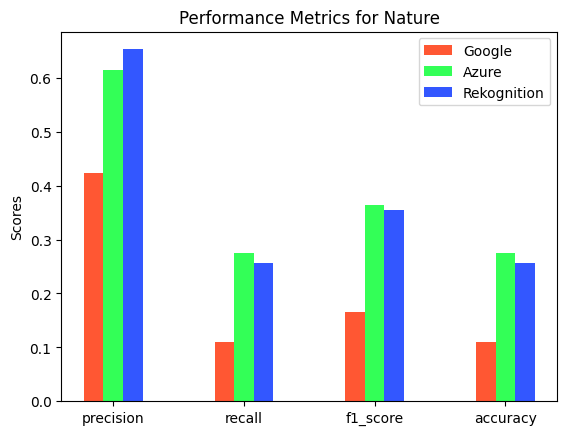

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your output
google_metrics = {'precision': 0.4230769230769231, 'recall': 0.10897435897435896, 'f1_score': 0.16538461538461538, 'accuracy': 0.10897435897435896}
azure_metrics = {'precision': 0.6153846153846154, 'recall': 0.2756410256410256, 'f1_score': 0.3640859140859141, 'accuracy': 0.2756410256410256}
rekognition_metrics = {'precision': 0.6538461538461539, 'recall': 0.25641025641025633, 'f1_score': 0.355111555111555, 'accuracy': 0.25641025641025633}

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create bar plots
def create_bar_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, data[0], width, label='Google', color='#FF5733')   # Bright orange
    rects2 = ax.bar(x, data[1], width, label='Azure', color='#33FF57')  # Bright green
    rects3 = ax.bar(x + width, data[2], width, label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_bar_plot([google_data, azure_data, rekognition_data], metrics, 'Performance Metrics for Nature')


In [6]:
#Objects
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the controlled vocabularies and generated tags
controlled_vocab = {
    'Coin': ['Currency', 'Ancient money', 'Numismatics', 'Metal artifact', 'Historical'],
    'Air Fryer': ['Kitchen appliance', 'Cooking gadget', 'Healthy cooking', 'Countertop device', 'Modern kitchen'],
    'Bicycle': ['Transportation', 'Cycling', 'Two-wheeler', 'Outdoor activity', 'Fitness equipment'],
    'Cooking Utensils': ['Kitchen tools', 'Food preparation', 'Cookware', 'Kitchen essentials', 'Culinary instruments'],
    'CD Player': ['Audio equipment', 'Music player', 'Electronics', 'Home entertainment', 'Digital media'],
    'Chair': ['Furniture', 'Seating', 'Home decor', 'Interior design', 'Living space'],
    'Japanese Coin': ['Currency', 'Ancient money', 'Numismatics', 'Metal artifact', 'Historical'],
    'Dual CD Player': ['Audio equipment', 'Music player', 'Electronics', 'Home entertainment', 'Digital media'],
    'Fat Tire E-Bike': ['Electric bicycle', 'Transportation', 'Outdoor activity', 'Eco-friendly', 'Fitness equipment'],
    'Car': ['Automobile', 'Transportation', 'Vehicle', 'Luxury car', 'Sports car'],
    'Arabic Coin': ['Currency', 'Ancient money', 'Numismatics', 'Metal artifact', 'Historical'],
    'iPhone': ['Smartphone', 'Mobile device', 'Apple product', 'Technology', 'Communication'],
    'Kitchen Hob': ['Kitchen appliance', 'Cooking gadget', 'Food preparation', 'Kitchen essentials', 'Culinary equipment'],
    'Kitchen Oven': ['Kitchen appliance', 'Cooking gadget', 'Food preparation', 'Baking', 'Culinary equipment'],
    'Lime E-Bikes': ['Electric bicycle', 'Shared transportation', 'Eco-friendly', 'Urban mobility', 'Outdoor activity'],
    'London Buses': ['Public transportation', 'City buses', 'Urban mobility', 'Double-decker bus', 'London'],
    'Fast Train': ['Public transportation', 'High-speed rail', 'Train travel', 'Urban mobility', 'London'],
    'Long Truck': ['Freight transport', 'Heavy vehicle', 'Logistics', 'Transportation', 'Commercial vehicle'],
    'Military Truck': ['Defense vehicle', 'Armored transport', 'Military equipment', 'Tactical vehicle', 'Transportation'],
    'Nokia Old Phone': ['Mobile device', 'Communication', 'Technology', 'Vintage phone', 'Cell phone'],
    'Palm Treo': ['Smartphone', 'Mobile device', 'Personal digital assistant', 'Communication', 'Technology'],
    'Silver Bowl': ['Kitchenware', 'Decorative item', 'Silverware', 'Antique', 'Dining'],
    'Ancient Pottery': ['Ceramic artifact', 'Historical item', 'Museum piece', 'Archeology', 'Art'],
    'Parked Aeroplanes': ['Aircraft', 'Aviation', 'Airport', 'Transportation', 'Planes'],
    'Piccadilly Line': ['Public transportation', 'Subway train', 'London Underground', 'Urban mobility', 'Metro'],
    'Sofas': ['Furniture', 'Seating', 'Home decor', 'Living room', 'Interior design'],
    'Take Off': ['Airplane', 'Aviation', 'Flight', 'Transportation', 'Airport'],
    'Typewriter': ['Writing tool', 'Vintage equipment', 'Office supplies', 'Mechanical device', 'Typing'],
    'US Marine Corps Truck': ['Military vehicle', 'Armored transport', 'Defense equipment', 'Tactical vehicle', 'Transportation'],
    'Kitchen Utensils': ['Cooking tools', 'Kitchen essentials', 'Food preparation', 'Cookware', 'Culinary instruments'],
    'Tape Recorder': ['Audio equipment', 'Recording device', 'Cassette tape', 'Home electronics', 'Voice recording'],
    'Walkman': ['Portable music player', 'Audio equipment', 'Cassette player', 'Personal electronics', 'Music listening'],
}

azure_tags = {
    'Coin': ['coin', 'metal', 'currency', 'money', 'mint', 'bronze', 'nickel', 'cash', 'obverse', 'silver'],
    'Air Fryer': ['kitchen appliance', 'appliance', 'home appliance', 'food', 'small appliance', 'fruit', 'indoor', 'cooking', 'oven', 'fast food'],
    'Bicycle': ['bike', 'transport', 'bicycle wheel', 'bicycle frame', 'tire', 'land vehicle', 'bicycle tire', 'vehicle', 'bicycle fork', 'bicycle stem'],
    'Cooking Utensils': ['kitchenware', 'kitchen utensil', 'turner'],
    'CD Player': ['electronics', 'text', 'electronic device', 'music', 'compact disk', 'sound', 'design'],
    'Chair': ['furniture', 'floor', 'chair', 'indoor', 'armrest', 'wall', 'stool', 'design'],
    'Japanese Coin': ['metal', 'coin', 'symbol', 'emblem', 'bronze', 'copper'],
    'Dual CD Player': ['electronics', 'vinyl record', 'data storage device', 'text', 'record player', 'electronic device', 'compact disk'],
    'Fat Tire E-Bike': ['tire', 'transport', 'land vehicle', 'vehicle', 'bike', 'spoke', 'bicycle wheel', 'bicycle', 'bicycle tire', 'bicycle frame'],
    'Car': ['land vehicle', 'supercar', 'vehicle', 'wheel', 'sports car', 'lamborghini', 'automotive design', 'porsche', 'lotus', 'luxury vehicle'],
    'Arabic Coin': ['drawing', 'art', 'symbol', 'coin'],
    'iPhone': ['electronic device', 'gadget', 'mobile phone', 'electronics', 'portable communications device', 'smartphone'],
    'Kitchen Hob': ['indoor', 'countertop', 'wall', 'sink', 'cabinetry', 'kitchen appliance', 'home appliance', 'gas stove', 'kitchen stove', 'drawer'],
    'Kitchen Oven': ['kitchen appliance', 'cabinet', 'appliance', 'indoor', 'home appliance', 'oven', 'microwave oven', 'major appliance', 'wall', 'food warmer'],
    'Lime E-Bikes': ['wheel', 'land vehicle', 'vehicle', 'building', 'transport', 'tire', 'outdoor', 'bicycle wheel', 'spoke', 'bicycle'],
    'London Buses': ['text', 'vehicle', 'land vehicle', 'outdoor', 'bus', 'decker', 'road', 'transport', 'mode of transport', 'double-decker bus'],
    'Fast Train': ['transport', 'train', 'public transport', 'track', 'railway', 'vehicle', 'train station', 'transport hub', 'outdoor', 'rolling stock'],
    'Long Truck': ['transport', 'vehicle', 'wheel', 'land vehicle', 'commercial vehicle', 'outdoor', 'freight transport', 'trailer', 'trailer truck', 'cargo'],
    'Military Truck': ['transport', 'vehicle', 'wheel', 'land vehicle', 'tire', 'outdoor', 'military vehicle', 'sky', 'off-road vehicle', 'auto part'],
    'Nokia Old Phone': ['mobile phone', 'gadget', 'electronic device', 'portable communications device', 'communication device', 'mobile device', 'phone', 'telephone', 'telephony', 'smartphone'],
    'Palm Treo': ['electronics', 'telephone', 'mobile phone', 'electronic device', 'gadget', 'portable communications device', 'communication device', 'mobile device', 'telephony', 'feature phone'],
    'Silver Bowl': ['tableware', 'dishware', 'silver', 'ceramic', 'bowl', 'indoor'],
    'Ancient Pottery': ['pottery', 'earthenware', 'vase', 'urn', 'ceramic', 'indoor', 'jar', 'plant', 'art', 'museum'],
    'Parked Aeroplanes': ['outdoor', 'plane', 'vehicle', 'ground', 'air travel', 'aircraft', 'jet aircraft', 'transport', 'aviation', 'aerospace manufacturer'],
    'Piccadilly Line': ['transport', 'train', 'public transport', 'train station', 'railway', 'metro station', 'transport hub', 'passenger car', 'metro', 'rolling stock'],
    'Sofas': ['tree', 'couch', 'studio couch', 'outdoor', 'furniture', 'sofa bed', 'loveseat', 'outdoor furniture', 'armrest', 'outdoor sofa'],
    'Take Off': ['plane', 'outdoor', 'sky', 'air travel', 'aircraft', 'airliner', 'airline', 'airport', 'aviation', 'narrow-body aircraft'],
    'Typewriter': ['office equipment', 'electronic device', 'office supplies', 'input device', 'space bar', 'peripheral', 'gadget', 'computer component', 'computer keyboard', 'text'],
    'US Marine Corps Truck': ['transport', 'vehicle', 'wheel', 'land vehicle', 'tire', 'military vehicle', 'sky', 'truck', 'outdoor', 'auto part'],
    'Kitchen Utensils': ['kitchenware', 'cookware and bakeware', 'kitchen utensil', 'indoor', 'kettle', 'silver'],
    'Tape Recorder': ['text', 'office supplies', 'indoor', 'mobile phone', 'gadget', 'electronic device'],
    'Walkman': ['text', 'office supplies', 'indoor', 'mobile phone', 'gadget', 'electronic device']
}

rekognition_tags = {
    'Coin': ['silver', 'coin', 'money', 'person', 'nickel', 'head', 'face', 'grenade', 'weapon', 'dime'],
    'Air Fryer': ['device', 'appliance', 'electrical device', 'cooking', 'oven', 'roasting', 'food', 'pizza'],
    'Bicycle': ['bicycle', 'transportation', 'vehicle', 'machine', 'wheel', 'bmx'],
    'Cooking Utensils': ['cutlery', 'spoon', 'bottle', 'shaker', 'kitchen utensil', 'spatula', 'fork'],
    'CD Player': ['cd player', 'electronics', 'disk', 'dvd', 'cassette player', 'tape player'],
    'Chair': ['furniture', 'chair', 'wood', 'armchair', 'indoors', 'interior design', 'plywood'],
    'Japanese Coin': ['coin', 'money', 'cross', 'symbol', 'dime', 'nickel'],
    'Dual CD Player': ['cd player', 'electronics', 'disk', 'tape player', 'cassette player', 'dvd', 'amplifier', 'stereo'],
    'Fat Tire E-Bike': ['bicycle', 'transportation', 'vehicle', 'moped', 'motor scooter', 'motorcycle', 'machine', 'wheel', 'scooter', 'suspension'],
    'Car': ['machine', 'wheel', 'tire', 'car', 'vehicle', 'coupe', 'sports car', 'car wheel', 'headlight', 'bumper'],
    'Arabic Coin': ['coin', 'money', 'machine', 'wheel', 'nickel'],
    'iPhone': ['electronics', 'mobile phone', 'phone'],
    'Kitchen Hob': ['indoors', 'kitchen', 'cooking pot', 'cookware', 'pot', 'milk', 'interior design', 'spoon', 'device', 'kitchen island'],
    'Kitchen Oven': ['device', 'appliance', 'electrical device', 'microwave', 'oven', 'cooking', 'roasting', 'baking'],
    'Lime E-Bikes': ['wheel', 'person', 'bicycle', 'vehicle', 'necklace', 'hat', 'cycling', 'motorcycle', 'face', 'tricycle'],
    'London Buses': ['bus', 'transportation', 'vehicle', 'double decker bus', 'tour bus', 'person', 'bus stop', 'outdoors'],
    'Fast Train': ['railway', 'train', 'transportation', 'vehicle', 'terminal', 'train station', 'bullet train', 'locomotive'],
    'Long Truck': ['transportation', 'truck', 'vehicle', '18-wheeler truck'],
    'Military Truck': ['bumper', 'vehicle', 'bulldozer', 'machine', 'armored', 'military', 'wheel', 'half track', 'truck', 'weapon'],
    'Nokia Old Phone': ['electronics', 'mobile phone', 'phone', 'texting'],
    'Palm Treo': ['electronics', 'phone', 'mobile phone', 'computer', 'hand-held computer', 'texting'],
    'Silver Bowl': ['silver', 'bowl', 'scoreboard', 'glass', 'pottery'],
    'Ancient Pottery': ['jug', 'jar', 'pottery', 'vase', 'water jug', 'smoke pipe', 'bulldozer', 'machine'],
    'Parked Aeroplanes': ['aircraft', 'airplane', 'transportation', 'vehicle', 'military base', 'air base', 'airfield', 'airport', 'runway'],
    'Piccadilly Line': ['terminal', 'railway', 'train', 'train station', 'vehicle', 'subway', 'american football (ball)', 'computer hardware', 'monitor', 'screen'],
    'Sofas': ['couch', 'furniture', 'table', 'backyard', 'nature', 'outdoors', 'home decor', 'cushion', 'housing', 'coffee table'],
    'Take Off': ['aircraft', 'takeoff', 'vehicle', 'airliner', 'airplane', 'airport', 'flight', 'control tower', 'tower', 'airfield'],
    'Typewriter': ['computer', 'computer hardware', 'computer keyboard', 'electronics', 'hardware', 'speaker', 'pc', 'monitor', 'screen', 'hand-held computer'],
    'US Marine Corps Truck': ['bumper', 'vehicle', 'truck', 'wheel', 'adult', 'male', 'man', 'person', 'car', 'shoe'],
    'Kitchen Utensils': ['cookware', 'pot', 'cooking pot', 'food', 'cooking pan', 'bottle', 'shaker', 'bowl'],
    'Tape Recorder': ['electronics', 'tape player', 'cassette player', 'first aid'],
    'Walkman': ['electronics', 'tape player', 'cassette player', 'first aid']
}

vision_tags = {
    'Coin': ['head', 'photograph', 'coin', 'currency', 'nickel', 'money', 'artifact', 'silver', 'cash', 'metal'],
    'Air Fryer': ['food', 'recipe', 'ingredient', 'kitchen appliance', 'home appliance', 'cuisine', 'dish', 'natural foods', 'cooking', 'gas'],
    'Bicycle': ['bicycle', 'wheel', 'tire', 'bicycles--equipment and supplies', 'crankset', 'bicycle wheel', 'bicycle frame', 'bicycle seatpost', 'bicycle wheel rim', 'bicycle tire'],
    'Cooking Utensils': ['kitchen utensil', 'tableware', 'sports equipment', 'office supplies', 'gesture', 'chair', 'cutlery', 'audio equipment', 'personal protective equipment', 'basic pump'],
    'CD Player': ['gadget', 'audio equipment', 'font', 'multimedia', 'software', 'electronic device', 'screenshot', 'circle', 'logo', 'graphics'],
    'Chair': ['furniture', 'chair', 'comfort', 'wood', 'rectangle', 'floor', 'flooring', 'material property', 'hardwood', 'composite material'],
    'Japanese Coin': ['coin', 'currency', 'money', 'motor vehicle', 'money handling', 'font', 'artifact', 'emblem', 'circle', 'symbol'],
    'Dual CD Player': ['electronic device', 'circle', 'electronics accessory', 'magenta', 'record player', 'blank media', 'font', 'data storage device'],
    'Fat Tire E-Bike': ['bicycle', 'wheel', 'tire', 'bicycles--equipment and supplies', 'bicycle frame', 'crankset', 'bicycle wheel rim', 'bicycle tire', 'bicycle wheel', 'bicycle seatpost'],
    'Car': ['automotive parking light', 'wheel', 'tire', 'vehicle', 'car', 'automotive side-view mirror', 'hood', 'automotive lighting', 'automotive tire', 'motor vehicle'],
    'Arabic Coin': ['font', 'circle', 'artifact', 'art', 'symbol', 'drawing', 'metal', 'logo', 'illustration', 'pattern'],
    'iPhone': ['mobile phone', 'telephony', 'camera', 'communication device', 'gesture', 'telephone', 'portable communications device', 'bumper', 'mobile device', 'gadget'],
    'Kitchen Hob': ['building', 'pot rack', 'cabinetry', 'kitchen utensil', 'kitchen stove', 'wood', 'home appliance', 'tableware', 'kitchen', 'kitchen appliance'],
    'Kitchen Oven': ['food', 'tableware', 'kitchen appliance', 'home appliance', 'kitchen', 'wood', 'interior design', 'cuisine', 'plant', 'major appliance'],
    'Lime E-Bikes': ['bicycle', 'tire', 'wheel', 'bicycle tire', 'crankset', 'vehicle', 'automotive tire', 'bicycle frame', 'bicycle fork', 'bicycle saddle'],
    'London Buses': ['bus', 'land vehicle', 'wheel', 'vehicle', 'double-decker bus', 'tire', 'vehicle registration plate', 'motor vehicle', 'automotive parking light', 'mode of transport'],
    'Fast Train': ['train', 'vehicle', 'rolling stock', 'nature', 'transport hub', 'mode of transport', 'electricity', 'track', 'railway', 'locomotive'],
    'Long Truck': ['vehicle registration plate', 'tire', 'wheel', 'sky', 'vehicle', 'motor vehicle', 'truck', 'asphalt', 'bumper', 'automotive exterior'],
    'Military Truck': ['wheel', 'tire', 'automotive parking light', 'vehicle', 'sky', 'automotive tire', 'hood', 'motor vehicle', 'tread', 'grille'],
    'Nokia Old Phone': ['mobile phone', 'telephone', 'telephony', 'communication device', 'portable communications device', 'mobile device', 'space bar', 'gadget', 'font', 'numeric keypad'],
    'Palm Treo': ['mobile phone', 'telephony', 'portable communications device', 'communication device', 'mobile device', 'gadget', 'telephone', 'font', 'multimedia', 'electronic device'],
    'Silver Bowl': ['dishware', 'drinkware', 'serveware', 'artifact', 'souvenir', 'art', 'font', 'porcelain', 'tableware', 'ceramic'],
    'Ancient Pottery': ['drinkware', 'vase', 'serveware', 'art', 'artifact', 'creative arts', 'tableware', 'pottery', 'urn', 'earthenware'],
    'Parked Aeroplanes': ['automotive tire', 'wood', 'tire', 'line', 'automotive wheel system', 'landscape', 'wheel', 'grass', 'agriculture', 'soil'],
    'Piccadilly Line': ['train', 'land vehicle', 'vehicle', 'rolling stock', 'transport hub', 'fixture', 'railway', 'mode of transport', 'electricity', 'track'],
    'Sofas': ['furniture', 'plant', 'couch', 'property', 'outdoor sofa', 'tree', 'outdoor furniture', 'wood', 'sky', 'table'],
    'Take Off': ['sky', 'aircraft', 'airplane', 'jet engine', 'aerospace manufacturer', 'aircraft engine', 'aviation', 'flap', 'travel', 'air travel'],
    'Typewriter': ['peripheral', 'input device', 'output device', 'space bar', 'computer keyboard', 'office equipment', 'gadget', 'office supplies', 'electronic instrument', 'font'],
    'US Marine Corps Truck': ['wheel', 'tire', 'automotive parking light', 'vehicle', 'automotive tire', 'hood', 'truck', 'tread', 'sky', 'car'],
    'Kitchen Utensils': ['tableware', 'dishware', 'drinkware', 'kitchen appliance', 'serveware', 'kitchen utensil', 'cookware and bakeware', 'cutlery', 'kitchen', 'cup'],
    'Tape Recorder': ['musical instrument accessory', 'office equipment', 'gadget', 'output device', 'audio equipment', 'bumper', 'machine', 'electronic instrument', 'font', 'office supplies'],
    'Walkman': ['musical instrument accessory', 'office equipment', 'gadget', 'output device', 'audio equipment', 'bumper', 'machine', 'electronic instrument', 'font', 'office supplies']
}

# Function to calculate metrics
def calculate_metrics(controlled_vocab, tags_dict):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []

    for key in controlled_vocab.keys():
        # Convert both true and predicted tags to lowercase for case-insensitive comparison
        y_true = [1 if tag.lower() in [t.lower() for t in controlled_vocab[key]] else 0 for tag in controlled_vocab[key]]
        y_pred = [1 if tag.lower() in [t.lower() for t in tags_dict.get(key, [])] else 0 for tag in controlled_vocab[key]]

        precision_scores.append(precision_score(y_true, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_true, y_pred, zero_division=0))
        accuracy_scores.append(accuracy_score(y_true, y_pred))

    return {
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1_score': np.mean(f1_scores),
        'accuracy': np.mean(accuracy_scores)
    }

# Calculate metrics for each AI service
google_metrics = calculate_metrics(controlled_vocab, vision_tags)
azure_metrics = calculate_metrics(controlled_vocab, azure_tags)
rekognition_metrics = calculate_metrics(controlled_vocab, rekognition_tags)

# Print the results
print("Google Cloud Vision Metrics:")
print(google_metrics)
print("\nMicrosoft Azure Metrics:")
print(azure_metrics)
print("\nAmazon Rekognition Metrics:")
print(rekognition_metrics)


Google Cloud Vision Metrics:
{'precision': 0.5625, 'recall': 0.11875, 'f1_score': 0.19494047619047616, 'accuracy': 0.11875}

Microsoft Azure Metrics:
{'precision': 0.625, 'recall': 0.15000000000000002, 'f1_score': 0.23809523809523808, 'accuracy': 0.15000000000000002}

Amazon Rekognition Metrics:
{'precision': 0.40625, 'recall': 0.125, 'f1_score': 0.18377976190476186, 'accuracy': 0.125}


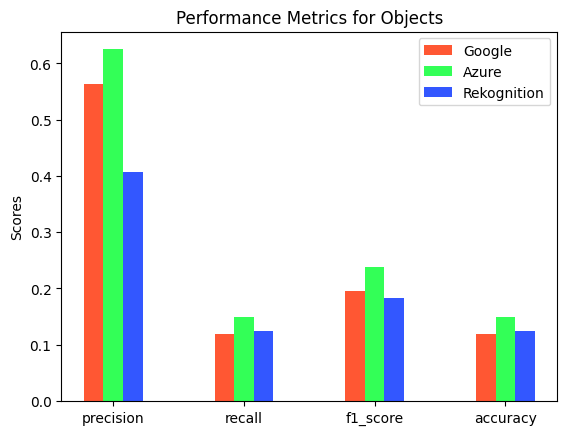

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your output
google_metrics = {'precision': 0.5625, 'recall': 0.11875, 'f1_score': 0.19494047619047616, 'accuracy': 0.11875}
azure_metrics = {'precision': 0.625, 'recall': 0.15000000000000002, 'f1_score': 0.23809523809523808, 'accuracy': 0.15000000000000002}
rekognition_metrics = {'precision': 0.40625, 'recall': 0.125, 'f1_score': 0.18377976190476186, 'accuracy': 0.125}

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create bar plots
def create_bar_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, data[0], width, label='Google', color='#FF5733')   # Bright orange
    rects2 = ax.bar(x, data[1], width, label='Azure', color='#33FF57')  # Bright green
    rects3 = ax.bar(x + width, data[2], width, label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_bar_plot([google_data, azure_data, rekognition_data], metrics, 'Performance Metrics for Objects')


In [7]:
#text and documents

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the controlled vocabularies and generated tags
# Controlled vocabulary for different categories
controlled_vocab = {
    "arabic newspapers": ["news", "arabic", "middle east", "politics", "economy", "social issues", "editorial", "current events", "political analysis", "economic trends", "social commentary", "middle eastern countries", "arabic"],
    "arabic poetry with english translation": ["poetry", "arabic", "translation", "bilingual", "literary", "arabic literature", "poetic forms", "cultural expressions", "nature", "social commentary", "beauty", "arabic", "english"],
    "chinese calligraphy": ["calligraphy", "chinese", "traditional script", "artistic writing", "chinese language", "calligraphy techniques", "cultural art", "traditional", "brush script", "chinese"],
    "english book page": ["literature", "english", "classic", "text", "academic", "english literature", "novel", "cultural studies", "english"],
    "english historical newspaper": ["newspaper", "english", "historical", "advertisement", "news", "news reporting", "historical events", "advertisements", "local news", "english"],
    "handwritten notes": ["handwriting", "personal", "notes", "message", "informal", "personal communication", "handwritten documents", "letters", "cursive", "block letters", "ink"],
    "digitized book page": ["book", "english", "digitization", "historical text", "literature", "history", "education", "digital scan", "archival document", "english"],
    "hindi poetry": ["hindi", "poetry", "love", "emotions", "inspiration", "life lessons"],
    "japanese script": ["japanese", "historical document", "script", "traditional", "handwritten", "calligraphy"],
    "khalil gibran poetry": ["khalil gibran", "arabic", "poetry", "philosophy", "life", "wisdom", "inspirational quotes"],
    "le monde newspaper": ["french", "newspaper", "le monde", "politics", "economy", "international news", "europe"],
    "everett advocate newspaper": ["local news", "everett", "community", "multilingual", "celebration", "events", "advocacy"],
    "magna carta book cover": ["law", "history", "ireland", "magna carta", "liberty", "legal principles", "book cover"],
    "marilyn monroe life magazine cover": ["marilyn monroe", "hollywood", "celebrity", "life magazine", "1952", "pop culture", "icon"],
    "multiple magazine covers (time, life, new yorker, national geographic)": ["magazine covers", "historical", "iconic", "portraits", "news", "culture", "politics", "science"],
    "national geographic cover 'afghan girl'": ["national geographic", "iconic photograph", "afghan girl", "human interest", "1985"],
    "national geographic cover 'found after 17 years'": ["national geographic", "afghan refugee", "human interest", "return", "2002"],
    "old arabic script": ["arabic", "manuscript", "calligraphy", "historical document", "islamic art", "religious text"],
    "old newspaper": ["newspaper", "events", "business", "health", "politics", "local news", "1970s"],
    "time magazine cover - 9/11": ["9/11", "world trade center", "terrorism", "new york", "historical event", "time magazine", "2001"],
    "time magazine cover - 'are you mom enough?'": ["parenting", "motherhood", "time magazine", "social issues", "controversy", "2012"],
    "urdu poetry": ["urdu", "poetry", "love", "emotion", "heartache", "philosophical", "literary art"]
}



azure_tags = {
    "arab magazine": ["text", "newspaper", "news", "newsprint", "publication", "tabloid", "magazine", "senior"],
    "arabic news paper": ["text", "newspaper", "man", "news", "clothing", "publication", "person", "suit", "newsprint"],
    "arabic poetry with translation": ["text", "font", "handwriting", "calligraphy", "ink", "document"],
    "chinese poem": ["text", "font", "handwriting", "typography", "number", "calligraphy"],
    "eng book page.png": ["text", "screenshot"],
    "eng newspaper": ["text", "newspaper", "newsprint", "black and white", "monochrome"],
    "eng page of book": ["text", "book", "paper", "handwriting", "font", "publication", "number", "document"],
    "googlebooks scan": ["text", "letter", "black and white", "screenshot", "document"],
    "hand written note 2": ["text", "handwriting", "calligraphy", "letter", "font", "ink", "document"],
    "hand written note": ["text", "handwriting", "letter", "paper", "document"],
    "hindi poetry": ["text", "book", "plant"],
    "japanese script": ["text", "handwriting", "paper", "book", "calligraphy", "document"],
    "khalil gibran poetry": ["text", "handwriting", "human face", "letter", "man", "autograph", "calligraphy", "signature", "ink", "document", "black and white"],
    "le-monde_1": ["text", "newspaper", "publication", "newsprint", "paper"],
    "magazine page": ["text", "newspaper", "news", "newsprint", "publication", "person", "human face", "tabloid", "magazine"],
    "magna carta": ["text", "handwriting", "letter", "book", "calligraphy", "paper", "document"],
    "marilyn monroe cover life.webp": ["text", "human face", "clothing", "lady", "smile", "person", "female person", "poster", "book", "woman", "retro style", "dress", "magazine"],
    "multiple magazine covers": ["text", "human face", "poster", "man", "graphic design", "fiction", "illustration", "art"],
    "nat geo cover": ["text", "human face", "book", "poster", "clothing", "woman", "book cover"],
    "national geographic": ["text", "human face", "poster", "woman", "magazine", "publication", "book cover", "flyer", "person", "book"],
    "old arabic script": ["handwriting", "text", "drawing", "indoor"],
    "old newspaper": ["text", "newspaper", "newsprint", "publication", "news", "person"],
    "times cover 9 11.webp": ["text", "poster", "screenshot", "outdoor", "smoke"],
    "times cover": ["text", "dog", "clothing", "woman", "footwear", "poster", "flyer", "person", "magazine"],
    "urdu poetry": ["text", "handwriting", "font", "calligraphy", "typography", "document"]
}


rekognition_tags = {
    "arab magazine": ["newspaper", "text", "adult", "male", "man", "person", "boy", "child", "head", "face"],
    "arabic news paper": ["publication", "text", "newspaper", "adult", "male", "man", "person", "qr code", "face", "head"],
    "arabic poetry with translation": ["page", "text", "book", "publication", "handwriting", "letter"],
    "chinese poem": ["text", "alphabet"],
    "eng book page.png": ["computer", "electronics", "tablet computer", "page", "text", "mobile phone", "phone"],
    "eng newspaper": ["text", "newspaper", "person", "head", "face"],
    "eng page of book": ["book", "publication", "page", "text", "novel", "diary"],
    "googlebooks scan": ["page", "text", "letter", "handwriting", "book", "publication", "advertisement", "poster"],
    "hand written note 2": ["text", "handwriting", "white board", "letter"],
    "hand written note": ["text", "white board", "handwriting", "page", "letter"],
    "hindi poetry": ["page", "text", "herbal", "plant", "advertisement", "poster", "leaf", "greeting card", "mail", "letter"],
    "japanese script": ["text", "book", "publication", "handwriting", "animal", "bird", "alphabet", "calligraphy"],
    "khalil gibran poetry": ["text", "adult", "male", "man", "person", "white board", "handwriting", "document"],
    "le-monde_1": ["text", "newspaper", "document", "id cards", "passport", "page"],
    "magazine page": ["adult", "male", "man", "person", "newspaper", "text", "publication", "female", "woman", "baby"],
    "magna carta": ["book", "publication", "text", "page", "handwriting", "novel", "diary"],
    "multiple magazine covers": ["publication", "adult", "male", "man", "person", "face", "head", "advertisement", "poster", "book"],
    "nat geo cover": ["publication", "book", "adult", "female", "person", "woman", "fashion", "advertisement", "poster", "hoodie"],
    "national geographic": ["advertisement", "poster", "publication", "head", "person", "photography", "portrait", "book", "blackboard", "novel"],
    "old arabic script": ["text", "book", "publication", "calligraphy", "handwriting", "alphabet", "symbol", "number"],
    "old newspaper": ["newspaper", "text", "person", "adult", "male", "man", "bride", "female", "woman", "face"],
    "times cover": ["publication", "adult", "female", "person", "woman", "chair", "shoe", "magazine", "face", "jeans"],
    "urdu poetry": ["text", "blackboard", "document", "alphabet", "handwriting"]
}



vision_tags = {
    "arab magazine": ["photograph", "newspaper", "organ", "publication", "news", "font", "sleeve", "advertising", "design", "newsprint"],
    "arabic news paper": ["newspaper", "publication", "font", "suit", "news", "blazer", "advertising", "newsprint", "paper", "formal wear"],
    "arabic poetry with translation": ["font", "handwriting", "number", "document", "art", "circle", "writing", "rectangle", "screenshot", "paper product"],
    "chinese poem": ["font", "art", "handwriting", "symmetry", "pattern", "parallel", "electric blue", "number", "ink", "drawing"],
    "eng book page.png": ["font", "rectangle", "material property", "electric blue", "parallel", "circle", "screenshot", "communication device", "square", "magenta"],
    "eng newspaper": ["newspaper", "font", "material property", "publication", "parallel", "paper", "paper product", "monochrome", "news", "newsprint"],
    "eng page of book": ["font", "publication", "paper", "paper product", "document", "symmetry"],
    "googlebooks scan": ["font", "paper", "document", "publication", "circle", "paper product"],
    "hand written note 2": ["handwriting", "font", "electric blue", "parallel", "writing", "number", "symmetry"],
    "hand written note": ["handwriting", "rectangle", "font", "parallel", "writing", "paper", "paper product", "pattern", "number", "letter"],
    "hindi poetry": ["plant", "font", "terrestrial plant", "twig", "event", "paper", "rectangle", "fashion accessory", "paper product", "pattern"],
    "japanese script": ["handwriting", "book", "font", "paper", "writing", "paper product", "document", "publication", "rectangle", "art"],
    "khalil gibran poetry": ["nose", "photograph", "facial expression", "white", "handwriting", "jaw", "smile", "beard", "gesture", "font"],
    "le-monde_1": ["newspaper", "publication", "font", "newsprint", "paper product", "paper", "document", "book", "circle", "parallel"],
    "magazine page": ["smile", "newspaper", "publication", "sleeve", "news", "font", "material property", "advertising", "newsprint", "tabloid"],
    "magna carta": ["book", "font", "publication", "handwriting", "paper", "parallel", "pattern", "illustration", "paper product", "document"],
    "multiple magazine covers": ["watch", "chin", "hairstyle", "human", "analog watch", "font", "art", "clock", "tie", "publication"],
    "nat geo cover": ["purple", "poster", "violet", "font", "magenta", "sleeve", "publication", "advertising", "graphic design", "illustration"],
    "national geographic": ["publication", "poster", "advertising", "book cover", "font", "book", "magazine", "fiction", "hair coloring", "flesh"],
    "old arabic script": ["handwriting", "art", "font", "writing", "rectangle", "book", "paper", "number", "parallel", "ink"],
    "old newspaper": ["newspaper", "publication", "news", "font", "material property", "newsprint", "parallel", "paper", "design", "paper product"],
    "times cover": ["arm", "leg", "shorts", "active tank", "knee", "thigh", "waist", "font", "handwriting", "sportswear"],
    "urdu poetry": ["handwriting", "font", "writing", "art", "darkness", "monochrome photography", "monochrome", "number", "illustration", "event"]
}


# Function to calculate metrics
def calculate_metrics(controlled_vocab, tags_dict):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []

    for key in controlled_vocab.keys():
        # Convert both true and predicted tags to lowercase for case-insensitive comparison
        y_true = [1 if tag.lower() in [t.lower() for t in controlled_vocab[key]] else 0 for tag in controlled_vocab[key]]
        y_pred = [1 if tag.lower() in [t.lower() for t in tags_dict.get(key, [])] else 0 for tag in controlled_vocab[key]]

        precision_scores.append(precision_score(y_true, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_true, y_pred, zero_division=0))
        accuracy_scores.append(accuracy_score(y_true, y_pred))

    return {
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1_score': np.mean(f1_scores),
        'accuracy': np.mean(accuracy_scores)
    }

# Calculate metrics for each AI service
google_metrics = calculate_metrics(controlled_vocab, vision_tags)
azure_metrics = calculate_metrics(controlled_vocab, azure_tags)
rekognition_metrics = calculate_metrics(controlled_vocab, rekognition_tags)

# Print the results
print("Google Cloud Vision Metrics:")
print(google_metrics)
print("\nMicrosoft Azure Metrics:")
print(azure_metrics)
print("\nAmazon Rekognition Metrics:")
print(rekognition_metrics)


Google Cloud Vision Metrics:
{'precision': 0.045454545454545456, 'recall': 0.006493506493506493, 'f1_score': 0.011363636363636364, 'accuracy': 0.006493506493506493}

Microsoft Azure Metrics:
{'precision': 0.09090909090909091, 'recall': 0.01406926406926407, 'f1_score': 0.02435064935064935, 'accuracy': 0.01406926406926407}

Amazon Rekognition Metrics:
{'precision': 0.13636363636363635, 'recall': 0.021645021645021644, 'f1_score': 0.037337662337662336, 'accuracy': 0.021645021645021644}


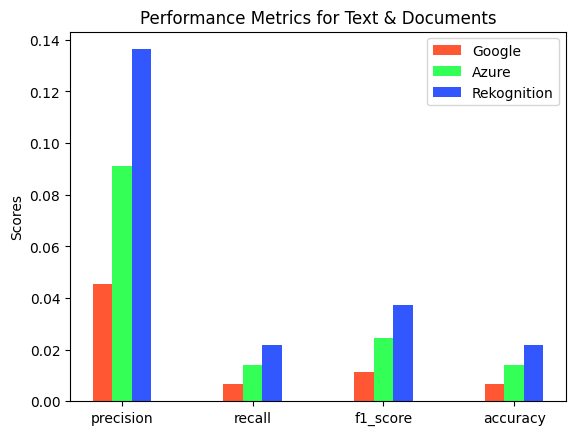

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your output
google_metrics = {'precision': 0.045454545454545456, 'recall': 0.006493506493506493, 'f1_score': 0.011363636363636364, 'accuracy': 0.006493506493506493}
azure_metrics = {'precision': 0.09090909090909091, 'recall': 0.01406926406926407, 'f1_score': 0.02435064935064935, 'accuracy': 0.01406926406926407}
rekognition_metrics = {'precision': 0.13636363636363635, 'recall': 0.021645021645021644, 'f1_score': 0.037337662337662336, 'accuracy': 0.021645021645021644}

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create bar plots
def create_bar_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, data[0], width, label='Google', color='#FF5733')   # Bright orange
    rects2 = ax.bar(x, data[1], width, label='Azure', color='#33FF57')  # Bright green
    rects3 = ax.bar(x + width, data[2], width, label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_bar_plot([google_data, azure_data, rekognition_data], metrics, 'Performance Metrics for Text & Documents')


In [8]:
#Urban and Rural Setting

import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the controlled vocabularies and generated tags
# Controlled vocabulary for different categories
controlled_vocab = {
    "african village scene": ["rural", "village", "traditional", "daily life", "africa", "rural sociology", "cultural anthropology"],
    "amsterdam cityscape": ["urban", "canals", "dutch architecture", "tourism", "amsterdam", "urban studies", "city planning"],
    "architectural styles in nyc": ["urban", "skyscrapers", "modern architecture", "new york city", "architecture", "urban design"],
    "baku city view": ["urban", "cityscape", "modern buildings", "baku", "azerbaijan", "urban planning", "eurasian cities"],
    "bengali village": ["rural", "village life", "bengal", "traditional houses", "rural development", "south asian cultures"],
    "copenhagen city square": ["urban", "public square", "european architecture", "copenhagen", "urban spaces", "european urban history"],
    "deconstructivist architecture": ["urban", "modern architecture", "deconstructivism", "innovative design", "architectural styles", "building techniques"],
    "english countryside": ["rural", "countryside", "traditional", "english villages", "rural landscapes", "english culture"],
    "florence city view": ["urban", "historical architecture", "florence", "italian cities", "renaissance architecture", "urban history"],
    "ghirardelli square": ["urban", "historical landmark", "san francisco", "public square", "american urban spaces", "historical buildings"],
    "hyde park, london": ["urban", "public parks", "green space", "london", "urban green spaces", "public parks"],
    "marina bay, singapore": ["urban", "modern architecture", "waterfront", "singapore", "urban landscapes", "asian cities"],
    "modern architecture example": ["urban", "contemporary architecture", "innovative design", "architectural design", "modern construction"],
    "regent street, london christmas lights": ["urban", "holiday season", "christmas decorations", "london", "cultural festivities", "urban decoration"],
    "regents park, london": ["urban", "public park", "green space", "london", "urban parks", "public spaces"],
    "shanghai cityscape": ["urban", "skyline", "modern architecture", "shanghai", "urban development", "chinese cities"],
    "trafalgar square": ["urban", "public square", "historical landmark", "london", "public spaces", "historical sites"],
    "vatican cityscape": ["urban", "historical architecture", "vatican", "catholic church", "religious sites", "european landmarks", "renaissance architecture"]
}



azure_tags = {
    "african village scene": ["outdoor", "mammal", "ground", "cattle", "animal", "village", "cart", "livestock", "rural area", "mule", "bovine", "cow", "grass", "donkey"],
    "amsterdam cityscape": ["outdoor", "building", "sky", "tree", "water", "cloud", "reflection", "lake", "waterway", "channel", "canal", "house", "boat", "city", "landscape", "harbor", "river"],
    "architectural styles in nyc": ["cloud", "sky", "outdoor", "car", "art"],
    "baku city view": ["sky", "outdoor", "building", "architecture", "large", "art"],
    "bengali village": ["sky", "outdoor", "cloud", "tree", "grass", "hut", "building", "thatching", "plant", "rural area", "ground", "landscape"],
    "copenhagen city square": ["building", "outdoor", "people", "town square", "pedestrian", "crowd", "person", "public space", "ground", "group", "street", "square", "city", "large", "crowded"],
    "deconstructivist architecture": ["outdoor", "building", "cloud", "sky", "commercial building", "road", "architecture", "mixed-use", "city", "large", "street"],
    "english countryside": ["outdoor", "tree", "sky", "window", "plant", "cloud", "building", "road", "cottage", "roof", "street", "landscape", "house", "autumn", "town"],
    "florence city view": ["outdoor", "building", "tree", "sky", "landscape", "house", "mountain", "tower", "city", "large", "church"],
    "ghirardelli square": ["tree", "plant", "outdoor", "building", "ground", "city", "people", "center"],
    "hyde park, london": ["cloud", "outdoor", "aerial photography", "sky", "bird's-eye view", "tree", "water", "building", "grass", "landscape", "aerial", "city", "nature", "river"],
    "marina bay, singapore": ["outdoor", "sky", "water", "building", "plane", "night", "airplane", "cloud", "lake", "harbor", "large", "city", "marina", "landscape"],
    "modern architecture example": ["sky", "architecture", "outdoor", "cloud", "tree", "property", "real estate", "building", "grass", "large"],
    "regent street, london christmas lights": ["vehicle", "land vehicle", "building", "street", "road", "wheel", "outdoor", "car", "street light", "traffic", "city", "light", "night"],
    "regents park, london": ["tree", "outdoor", "grass", "sky", "autumn", "landscaping", "botanical garden", "fall", "plant", "garden", "ground", "park"],
    "shanghai cityscape": ["outdoor", "sky", "skyline", "tower", "tower block", "cityscape", "metropolis", "metropolitan area", "building", "urban area", "downtown", "skyscraper", "lake", "commercial building", "water", "city", "river", "travel"],
    "trafalgar square": ["outdoor", "sky", "building", "cloud", "tree", "town square", "public space", "pedestrian", "street light", "landmark", "road", "downtown", "tourist attraction", "street", "people", "city", "square", "travel"],
    "vatican cityscape": ["outdoor", "cloud", "sky", "building", "dome", "classical architecture", "city", "medieval architecture", "landmark", "basilica", "palace", "cathedral", "byzantine architecture", "place of worship", "baptistery", "architecture", "facade", "seat of local government", "church", "street"]
}


rekognition_tags = {
    "african village scene": ["nature", "outdoors", "countryside", "rural", "child", "female", "girl", "person", "hut", "shelter"],
    "amsterdam cityscape": ["road", "city", "tarmac", "bicycle", "cycling", "person", "adult", "male", "man", "people"],
    "architectural styles in nyc": ["city", "urban", "road", "car", "office building", "bus", "person", "metropolis", "terminal", "stadium"],
    "baku city view": ["architecture", "building", "office building", "convention center", "city", "person", "urban", "opera house", "metropolis", "terminal"],
    "bengali village": ["nature", "outdoors", "countryside", "hut", "rural", "shelter", "person", "adult", "female", "woman"],
    "copenhagen city square": ["city", "urban", "downtown", "street", "people", "person", "fountain", "water", "fire hydrant", "metropolis"],
    "deconstructivist architecture": ["building", "convention center", "office building", "city", "urban", "person", "car", "wheel", "shopping mall", "street"],
    "english countryside": ["nature", "outdoors", "countryside", "suburb", "road", "rural", "village", "city", "street", "plant"],
    "florence city view": ["architecture", "building", "church", "landmark", "st. peter's basilica", "cityscape", "urban"],
    "ghirardelli square": ["city", "downtown", "urban", "person", "town square", "motorcycle", "vehicle", "sundial", "fountain", "water"],
    "hyde park, london": ["lake", "nature", "outdoors", "water", "aerial view", "scenery"],
    "marina bay, singapore": ["city", "cityscape", "urban", "waterfront", "metropolis", "outdoors", "scenery", "bridge", "sea", "high rise"],
    "modern architecture example": ["building", "house", "housing", "villa", "office building", "grass", "plant", "lawn", "factory", "urban"],
    "regent street, london christmas lights": ["city", "road", "street", "urban", "metropolis", "neighborhood", "lighting", "car", "building", "bus"],
    "regents park, london": ["grass", "nature", "outdoors", "park", "fountain", "water", "garden", "person", "autumn", "tree"],
    "shanghai cityscape": ["architecture", "building", "tower", "landmark", "oriental pearl tv tower"],
    "trafalgar square": ["city", "downtown", "urban", "handbag", "person", "street", "flag", "car", "town square", "bus"],
    "vatican cityscape": ["architecture", "building", "church", "landmark", "st. peter's basilica", "person", "flag"]
}

vision_tags = {
    "african village scene": ["building material", "house", "landscape", "adaptation", "thatching", "sky", "building", "soil", "hut", "tourism"],
    "amsterdam cityscape": ["sky", "building", "urban design", "composite material", "facade", "art", "commercial building", "headquarters", "city", "event"],
    "architectural styles in nyc": ["sky", "automotive design", "cloud", "urban design", "hood", "grille", "facade", "automotive exterior", "building", "city"],
    "baku city view": ["sky", "building", "urban design", "composite material", "facade", "art", "commercial building", "headquarters", "city", "event"],
    "bengali village": ["sky", "cloud", "ecoregion", "thatching", "plant", "building", "tree", "house", "rural area", "adaptation"],
    "copenhagen city square": ["building", "daytime", "photograph", "infrastructure", "window", "architecture", "urban design", "city", "crowd", "travel"],
    "deconstructivist architecture": ["cloud", "sky", "building", "window", "urban design", "facade", "commercial building", "city", "house", "art"],
    "english countryside": ["plant", "sky", "cloud", "building", "window", "road surface", "tree", "wood", "house", "natural landscape"],
    "florence city view": ["sky", "daytime", "mountain", "azure", "tree", "cityscape", "building", "landscape", "city", "morning"],
    "ghirardelli square": ["plant", "infrastructure", "tree", "building", "urban design", "leisure", "neighbourhood", "city", "landmark", "landscape"],
    "hyde park, london": ["cloud", "sky", "atmosphere", "daytime", "light", "nature", "world", "natural landscape", "tree", "urban design"],
    "marina bay, singapore": ["cloud", "sky", "water", "building", "light", "blue", "nature", "world", "body of water", "skyscraper"],
    "modern architecture example": ["sky", "cloud", "building", "window", "tree", "plant", "fixture", "urban design", "real estate", "facade"],
    "regent street, london christmas lights": ["tire", "land vehicle", "wheel", "vehicle", "building", "car", "automotive lighting", "infrastructure", "sky", "road surface"],
    "regents park, london": ["plant", "sky", "tree", "natural landscape", "hedge", "grass", "landscape", "shrub", "fountain", "tints and shades"],
    "shanghai cityscape": ["sky", "water", "skyscraper", "building", "tower", "tower block", "cityscape", "city", "condominium", "urban design"],
    "trafalgar square": ["cloud", "sky", "daytime", "building", "infrastructure", "plant", "tree", "tower", "urban design", "thoroughfare"],
    "vatican cityscape": ["sky", "cloud", "building", "window", "city", "facade", "monument", "symmetry", "plant", "dome"]
}



# Function to calculate metrics
def calculate_metrics(controlled_vocab, tags_dict):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []

    for key in controlled_vocab.keys():
        # Convert both true and predicted tags to lowercase for case-insensitive comparison
        y_true = [1 if tag.lower() in [t.lower() for t in controlled_vocab[key]] else 0 for tag in controlled_vocab[key]]
        y_pred = [1 if tag.lower() in [t.lower() for t in tags_dict.get(key, [])] else 0 for tag in controlled_vocab[key]]

        precision_scores.append(precision_score(y_true, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_true, y_pred, zero_division=0))
        accuracy_scores.append(accuracy_score(y_true, y_pred))

    return {
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1_score': np.mean(f1_scores),
        'accuracy': np.mean(accuracy_scores)
    }

# Calculate metrics for each AI service
google_metrics = calculate_metrics(controlled_vocab, vision_tags)
azure_metrics = calculate_metrics(controlled_vocab, azure_tags)
rekognition_metrics = calculate_metrics(controlled_vocab, rekognition_tags)

# Print the results
print("Google Cloud Vision Metrics:")
print(google_metrics)
print("\nMicrosoft Azure Metrics:")
print(azure_metrics)
print("\nAmazon Rekognition Metrics:")
print(rekognition_metrics)


Google Cloud Vision Metrics:
{'precision': 0.05555555555555555, 'recall': 0.009259259259259259, 'f1_score': 0.015873015873015872, 'accuracy': 0.009259259259259259}

Microsoft Azure Metrics:
{'precision': 0.1111111111111111, 'recall': 0.017195767195767195, 'f1_score': 0.02976190476190476, 'accuracy': 0.017195767195767195}

Amazon Rekognition Metrics:
{'precision': 0.7222222222222222, 'recall': 0.13809523809523808, 'f1_score': 0.2288359788359788, 'accuracy': 0.13809523809523808}


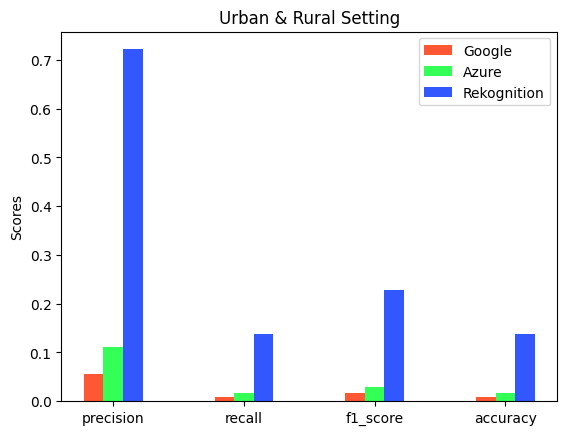

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your output
google_metrics = {'precision': 0.05555555555555555, 'recall': 0.009259259259259259, 'f1_score': 0.015873015873015872, 'accuracy': 0.009259259259259259}
azure_metrics = {'precision': 0.1111111111111111, 'recall': 0.017195767195767195, 'f1_score': 0.02976190476190476, 'accuracy': 0.017195767195767195}
rekognition_metrics = {'precision': 0.7222222222222222, 'recall': 0.13809523809523808, 'f1_score': 0.2288359788359788, 'accuracy': 0.13809523809523808}

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create bar plots
def create_bar_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, data[0], width, label='Google', color='#FF5733')   # Bright orange
    rects2 = ax.bar(x, data[1], width, label='Azure', color='#33FF57')  # Bright green
    rects3 = ax.bar(x + width, data[2], width, label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_bar_plot([google_data, azure_data, rekognition_data], metrics, 'Urban & Rural Setting')


In [2]:
#people
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Define the controlled vocabularies and generated tags
controlled_vocab = {
    'adults_selfie': ['Group photo', 'friends', 'smiling', 'diverse group'],
    'baby_girl': ['Infant', 'toddler', 'child', 'cute', 'blue eyes', 'headband'],
    'black_girl': ['Portrait', 'serious expression', 'freckles', 'black hair'],
    'black_portrait': ['Close-up', 'serious expression', 'dark skin', 'natural look'],
    'elderly_doing_exercise': ['Seniors', 'stretching', 'group activity', 'indoor'],
    'elderly_gardening': ['Seniors', 'outdoor activity', 'gardening', 'watering plants'],
    'elderly_playing_table_tennis': ['Seniors', 'outdoor activity', 'table tennis', 'happy'],
    'elderly_woman_gardening_in_backyard_with_daughter': ['Seniors', 'family', 'gardening', 'wheelchair'],
    'family_photos': ['Family', 'beach', 'casual', 'black and white'],
    'gladiators_pose_for_tourists_in_rome': ['Costumes', 'tourists', 'historical reenactment', 'group'],
    'group_of_people_mixed': ['Diverse group', 'portrait', 'serious expressions', 'different ages'],
    'kid_with_cows': ['Baby', 'animals', 'farm', 'outdoors', 'cute'],
    'kids_playing_football': ['Children', 'sports', 'soccer', 'football', 'park'],
    'kids_playing_in_park': ['Children', 'outdoors', 'friends', 'happy'],
    'kids_playing_outdoors': ['Children', 'nature', 'happiness', 'diversity'],
    'people_eating_pizza': ['Friends', 'dining', 'food', 'casual gathering'],
    'twin_babies': ['Infants', 'sleeping', 'siblings', 'cozy'],
    'white_adult': ['Portrait', 'close-up', 'natural', 'serious expression'],
    'white_kid': ['Boy', 'portrait', 'smiling', 'casual attire'],
    'white_kids_playground': ['Group photo', 'children', 'playground', 'school'],
}


azure_tags = {
    'adults_selfie': ['person', 'smile', 'human face', 'clothing', 'man', 'happy', 'friendship', 'laugh', 'fun', 'tooth', 'selfie', 'adolescent', 'group', 'love', 'social group', 'youth', 'posing', 'people', 'smiling', 'woman', 'indoor'],
    'baby_girl': ['toddler', 'human face', 'person', 'baby', 'clothing', 'child', 'baby & toddler clothing', 'child model'],
    'black_girl': ['human face', 'person', 'lip', 'eyebrow', 'eyelash', 'skin', 'portrait photography', 'cheek', 'portrait', 'girl', 'lipstick', 'forehead', 'woman', 'face'],
    'black_portrait': ['human face', 'person', 'eyebrow', 'skin', 'eyelash', 'cheek', 'forehead', 'lip', 'portrait', 'indoor', 'face'],
    'elderly_doing_exercise': ['clothing', 'person', 'wall', 'furniture', 'indoor', 'chair', 'footwear', 'man', 'woman', 'group', 'people', 'adult', 'dance', 'floor'],
    'elderly_gardening': ['clothing', 'person', 'outdoor', 'plant', 'grass', 'gardener', 'farmworker', 'gardening', 'footwear', 'woman', 'people', 'fall'],
    'elderly_playing_table_tennis': ['person', 'table-tennis table', 'clothing', 'outdoor', 'table', 'tree', 'man', 'ping pong', 'table tennis racket', 'grass', 'standing'],
    'elderly_woman_gardening_in_backyard_with_daughter': ['person', 'clothing', 'outdoor', 'wheel', 'plant', 'sun hat', 'flower', 'wheelchair', 'grass', 'woman', 'sitting', 'hat', 'lady', 'girl'],
    'family_photos': ['outdoor', 'sky', 'person', 'clothing', 'people', 'man', 'ground', 'water', 'beach', 'group', 'black and white', 'standing'],
    'gladiators_pose_for_tourists_in_rome': ['clothing', 'person', 'man', 'footwear', 'woman', 'costume', 'cosplay', 'fan convention', 'fashion accessory', 'people', 'outdoor', 'ground', 'street', 'armor'],
    'group_of_people_mixed': ['human face', 'woman', 'clothing', 'person', 'fashion'],
    'kid_with_cows': ['grass', 'outdoor', 'plant', 'human face', 'field', 'farm', 'person', 'girl', 'child'],
    'kids_playing_football': ['person', 'outdoor', 'grass', 'tree', 'football', 'ball', 'athletic game', 'sport', 'footwear', 'soccer ball', 'soccer', 'soccer player', 'playground', 'sports equipment', 'playing', 'field', 'football player', 'kick', 'forward', 'young', 'group', 'boy', 'child'],
    'kids_playing_in_park': ['clothing', 'person', 'human face', 'tree', 'outdoor', 'girl', 'smile', 'toddler', 'group', 'sitting', 'young', 'people', 'child', 'boy', 'ground', 'plant'],
    'kids_playing_outdoors': ['person', 'grass', 'outdoor', 'clothing', 'football', 'soccer', 'building', 'footwear', 'ball', 'plant', 'boy', 'man', 'jeans', 'playground', 'people', 'girl', 'woman'],
    'people_eating_pizza': ['person', 'clothing', 'human face', 'food', 'man', 'people', 'table', 'woman', 'group', 'tableware', 'fast food', 'supper', 'lunch', 'eating', 'indoor', 'sitting', 'wall', 'dinner', 'meal', 'banquet'],
    'twin_babies': ['newborn', 'person', 'human face', 'child', 'toddler', 'boy', 'indoor', 'baby', 'sleep', 'baby & toddler clothing', 'comfort', 'skin', 'nap', 'wall'],
    'white_adult': ['human face', 'person', 'skin', 'portrait photography', 'eyebrow', 'lip', 'portrait', 'eyelash', 'lady', 'layered hair', 'brown hair', 'cheek', 'chin', 'throat', 'forehead', 'female person', 'woman', 'neck', 'lipstick', 'long hair', 'girl', 'face'],
    'white_kid': ['human face', 'person', 'smile', 'clothing', 'chin', 'neck', 'skin', 'portrait', 'bangs', 'portrait photography', 'lip', 'toddler', 'sleeve', 'wall', 'young', 'boy', 'shirt', 'child'],
    'white_kids_playground': ['clothing', 'outdoor', 'person', 'footwear', 'tree', 'group', 'playground', 'people', 'grass', 'boy', 'child', 'young', 'park', 'red', 'climbing frame'],
}

rekognition_tags = {
    'adults_selfie': ['people', 'person', 'head', 'face', 'happy', 'smile', 'laughing', 'adult', 'bride', 'woman'],
    'baby_girl': ['person', 'sitting', 'face', 'head', 'photography', 'portrait', 'baby', 'happy', 'finger', 'sleeve'],
    'black_girl': ['head', 'person', 'face', 'photography', 'portrait', 'skin', 'adult', 'female', 'woman', 'freckle'],
    'black_portrait': ['face', 'head', 'person', 'photography', 'portrait', 'skin', 'body part', 'neck', 'cosmetics', 'lipstick'],
    'elderly_doing_exercise': ['people', 'person', 'head', 'adult', 'male', 'man', 'face', 'happy', 'celebrating', 'bride'],
    'elderly_gardening': ['garden', 'nature', 'outdoors', 'gardening', 'adult', 'male', 'man', 'person', 'gardener', 'glove'],
    'elderly_playing_table_tennis': ['adult', 'male', 'man', 'person', 'face', 'head', 'ping pong paddle', 'racket', 'sport', 'senior citizen'],
    'elderly_woman_gardening_in_backyard_with_daughter': ['garden', 'nature', 'outdoors', 'gardening', 'adult', 'female', 'person', 'woman', 'hat', 'wheel'],
    'family_photos': ['photography', 'person', 'walking', 'people', 'portrait', 'coat', 'beach', 'pants', 'adult', 'man'],
    'gladiators_pose_for_tourists_in_rome': ['costume', 'person', 'adult', 'female', 'woman', 'male', 'man', 'handbag', 'skirt', 'baby'],
    'group_of_people_mixed': ['photography', 'face', 'head', 'person', 'portrait', 'adult', 'female', 'woman', 'glasses', 'man'],
    'kid_with_cows': ['photography', 'person', 'portrait', 'grass', 'field', 'grassland', 'nature', 'outdoors', 'baby', 'livestock'],
    'kids_playing_football': ['boy', 'child', 'male', 'person', 'female', 'girl', 'people', 'play', 'shorts', 'football'],
    'kids_playing_in_park': ['people', 'person', 'face', 'happy', 'head', 'boy', 'child', 'male', 'female', 'girl'],
    'kids_playing_outdoors': ['soccer ball', 'people', 'person', 'jeans', 'grass', 'boy', 'child', 'male', 'girl', 'teen'],
    'people_eating_pizza': ['brunch', 'people', 'person', 'eating', 'pizza', 'head', 'face', 'adult', 'female', 'woman'],
    'twin_babies': ['blanket', 'photography', 'face', 'head', 'person', 'portrait', 'baby', 'people', 'newborn', 'sleeping'],
    'white_adult': ['face', 'head', 'person', 'photography', 'portrait', 'adult', 'female', 'woman', 'smile', 'skin'],
    'white_kid': ['person', 'photography', 'portrait', 'blonde', 'coat', 'smile', 'jacket', 'boy', 'child', 'male'],
    'white_kids_playground': ['grass', 'people', 'person', 'park', 'shoe', 'female', 'girl', 'teen', 'child', 'male'],
}


vision_tags = {
    'adults_selfie': ['smile', 'nose', 'skin', 'chin', 'mouth', 'facial expression', 'tooth', 'white', 'human', 'neck'],
    'baby_girl': ['face', 'skin', 'arm', 'white', 'product', 'baby & toddler clothing', 'sleeve', 'gesture', 'toddler', 'happy'],
    'black_girl': ['forehead', 'nose', 'brown', 'cheek', 'skin', 'lip', 'eyelash', 'flash photography', 'jaw', 'temple'],
    'black_portrait': ['forehead', 'nose', 'cheek', 'lip', 'eyelash', 'flash photography', 'jaw', 'iris', 'ear', 'no expression'],
    'elderly_doing_exercise': ['furniture', 'gesture', 'happy', 'chair', 'couch', 'event', 'fashion design', 'performing arts', 'fun', 'leisure'],
    'elderly_gardening': ['plant', 'plant community', 'people in nature', 'sky', 'natural environment', 'tree', 'farmer', 'grass', 'agriculture', 'natural landscape'],
    'elderly_playing_table_tennis': ['smile', 'muscle', 'gesture', 'happy', 'leisure', 't-shirt', 'community', 'shorts', 'grass', 'competition event'],
    'elderly_woman_gardening_with_daughter': ['plant', 'flower', 'wheel', 'hat', 'sun hat', 'grass', 'leisure', 'terrestrial plant', 'wheelchair', 'summer'],
    'eledelry_gardening': ['plant', 'natural environment', 'tree', 'sky', 'garden tool', 'people in nature', 'grass', 'rural area', 'landscape', 'compost'],
    'family_photos': ['water', 'people in nature', 'people on beach', 'sky', 'flash photography', 'gesture', 'happy', 'style', 'black-and-white', 'leisure'],
    'gladiators_pose_for_tourists_in_rome': ['footwear', 'shoe', 'hat', 'shorts', 'event', 'belt', 'tradition', 'eyewear', 'costume', 'fun'],
    'group_of_people_mixed': ['glasses', 'skin', 'hairstyle', 'facial expression', 'black', 'fashion', 'flash photography', 'social group', 'smile', 'art'],
    'kid_with_cows': ['nature', 'people in nature', 'happy', 'sunlight', 'rabbit', 'grass', 'hat', 'fawn', 'grassland', 'summer'],
    'kids_playing_football': ['shorts', 'soccer', 'playing sports', 'sports equipment', 'plant', 'football', 'green', 'tree', 'player', 'ball'],
    'kids_playing_in_park': ['face', 'smile', 'plant', 'people in nature', 'botany', 'happy', 'tree', 'leisure', 'grass', 'adaptation'],
    'kids_playing_outdoors': ['jeans', 'shorts', 'plant', 'daytime', 'window', 'vertebrate', 'sports equipment', 'football', 'soccer', 'ball'],
    'people_eating_pizza': ['food', 'tableware', 'human', 'table', 'orange', 'plate', 'sharing', 'cuisine', 'wine glass', 'dish'],
    'twin_babies': ['face', 'cheek', 'skin', 'chin', 'comfort', 'baby', 'gesture', 'happy', 'flash photography', 'toddler'],
    'white_adult': ['nose', 'cheek', 'lip', 'eyebrow', 'eyelash', 'flash photography', 'jaw', 'iris', 'makeover', 'black hair'],
    'white_kid_2': ['nose', 'face', 'smile', 'jaw', 'neck', 'sleeve', 'happy', 'bangs', 'eyelash', 'black hair'],
    'white_kid': ['face', 'chin', 'outerwear', 'smile', 'eye', 'neck', 'sleeve', 'collar', 'happy', 'flash photography'],
    'white_kids_playground': ['plant', 'botany', 'tree', 'leisure', 'red', 'smile', 'grass', 'recreation', 'fun', 'event'],
    'white_lady': ['forehead', 'nose', 'cheek', 'skin', 'lip', 'lipstick', 'eyebrow', 'eyelash', 'eye liner', 'organ']
}


# Function to calculate metrics
def calculate_metrics(controlled_vocab, tags_dict):
    precision_scores = []
    recall_scores = []
    f1_scores = []
    accuracy_scores = []

    for key in controlled_vocab.keys():
        # Convert both true and predicted tags to lowercase for case-insensitive comparison
        y_true = [1 if tag.lower() in [t.lower() for t in controlled_vocab[key]] else 0 for tag in controlled_vocab[key]]
        y_pred = [1 if tag.lower() in [t.lower() for t in tags_dict.get(key, [])] else 0 for tag in controlled_vocab[key]]

        precision_scores.append(precision_score(y_true, y_pred, zero_division=0))
        recall_scores.append(recall_score(y_true, y_pred, zero_division=0))
        f1_scores.append(f1_score(y_true, y_pred, zero_division=0))
        accuracy_scores.append(accuracy_score(y_true, y_pred))

    return {
        'precision': np.mean(precision_scores),
        'recall': np.mean(recall_scores),
        'f1_score': np.mean(f1_scores),
        'accuracy': np.mean(accuracy_scores)
    }

# Calculate metrics for each AI service
google_metrics = calculate_metrics(controlled_vocab, vision_tags)
azure_metrics = calculate_metrics(controlled_vocab, azure_tags)
rekognition_metrics = calculate_metrics(controlled_vocab, rekognition_tags)

# Print the results
print("Google Cloud Vision Metrics:")
print(google_metrics)
print("\nMicrosoft Azure Metrics:")
print(azure_metrics)
print("\nAmazon Rekognition Metrics:")
print(rekognition_metrics)


Google Cloud Vision Metrics:
{'precision': 0.25, 'recall': 0.06583333333333333, 'f1_score': 0.10285714285714284, 'accuracy': 0.06583333333333333}

Microsoft Azure Metrics:
{'precision': 0.65, 'recall': 0.19666666666666666, 'f1_score': 0.29690476190476195, 'accuracy': 0.19666666666666666}

Amazon Rekognition Metrics:
{'precision': 0.55, 'recall': 0.15499999999999997, 'f1_score': 0.23857142857142857, 'accuracy': 0.15499999999999997}


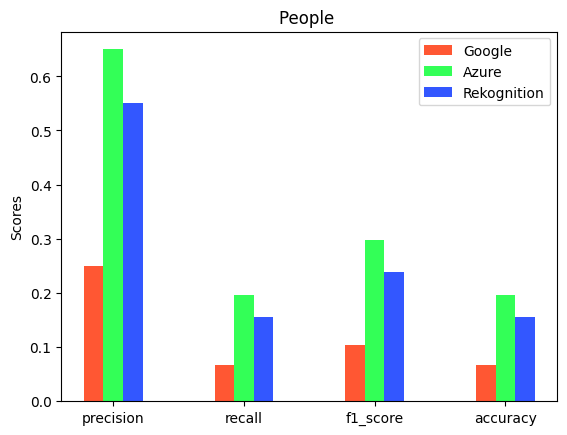

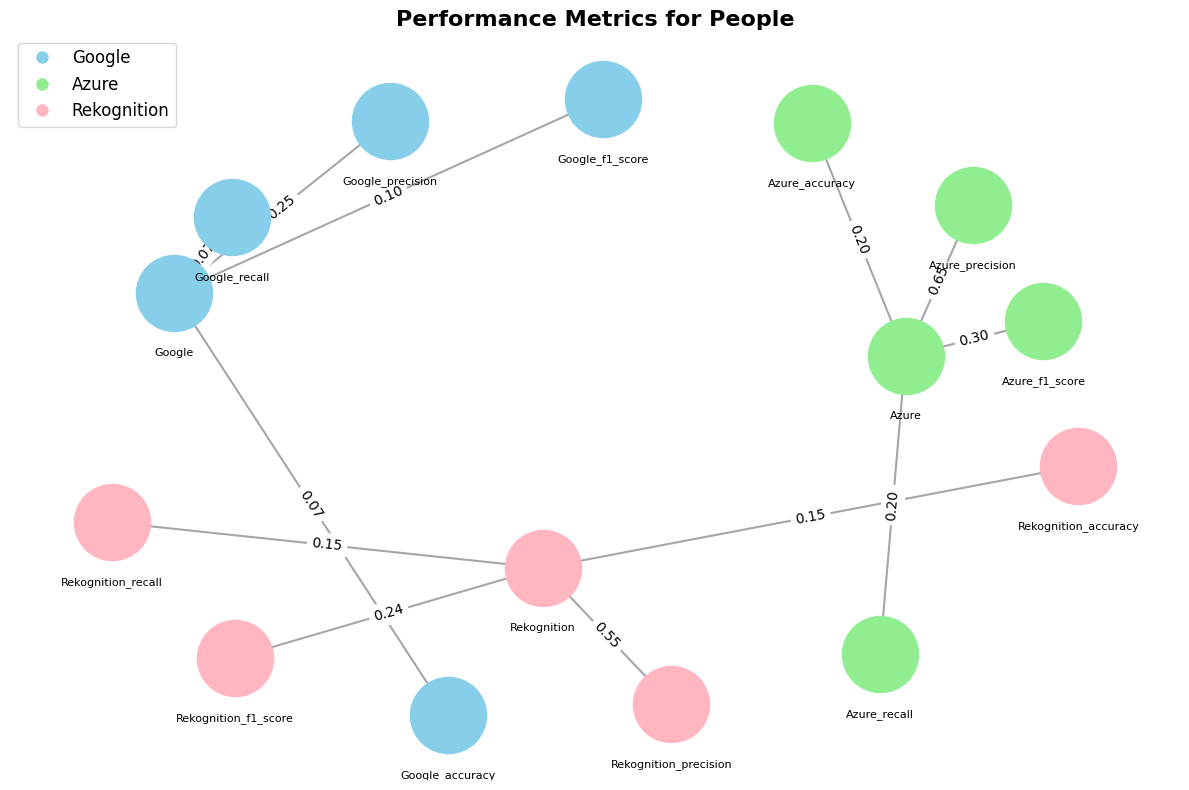

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Results from your output
google_metrics = {'precision': 0.25, 'recall': 0.06583333333333333, 'f1_score': 0.10285714285714284, 'accuracy': 0.0658333333333333}
azure_metrics = {'precision': 0.65, 'recall': 0.19666666666666666, 'f1_score': 0.29690476190476195, 'accuracy': 0.19666666666666666}
rekognition_metrics = {'precision': 0.55, 'recall': 0.15499999999999997, 'f1_score':  0.23857142857142857, 'accuracy': 0.15499999999999997}

# Prepare data for plotting
metrics = ['precision', 'recall', 'f1_score', 'accuracy']
google_data = [google_metrics[metric] for metric in metrics]
azure_data = [azure_metrics[metric] for metric in metrics]
rekognition_data = [rekognition_metrics[metric] for metric in metrics]

# Function to create bar plots
def create_bar_plot(data, labels, title):
    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, data[0], width, label='Google', color='#FF5733')   # Bright orange
    rects2 = ax.bar(x, data[1], width, label='Azure', color='#33FF57')  # Bright green
    rects3 = ax.bar(x + width, data[2], width, label='Rekognition', color='#3357FF')  # Bright blue

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# Plot the data
create_bar_plot([google_data, azure_data, rekognition_data], metrics, 'People ')




#new code

import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Results from your output
google_metrics = {'precision': 0.25, 'recall': 0.06583333333333333, 'f1_score': 0.10285714285714284, 'accuracy': 0.0658333333333333}
azure_metrics = {'precision': 0.65, 'recall': 0.19666666666666666, 'f1_score': 0.29690476190476195, 'accuracy': 0.19666666666666666}
rekognition_metrics = {'precision': 0.55, 'recall': 0.15499999999999997, 'f1_score':  0.23857142857142857, 'accuracy': 0.15499999999999997}


# Create a directed graph
G = nx.DiGraph()

# Define color mapping for API types
color_map = {
    'Google': 'skyblue',
    'Azure': 'lightgreen',
    'Rekognition': 'lightpink'
}

# Add nodes
services = ['Google', 'Azure', 'Rekognition']
for service in services:
    for metric in metrics:
        G.add_node(f"{service}_{metric}", color=color_map[service])

# Add edges with weights
data = {'Google': google_data, 'Azure': azure_data, 'Rekognition': rekognition_data}
for service, values in data.items():
    for metric, value in zip(metrics, values):
        G.add_edge(service, f"{service}_{metric}", weight=value)

# Position nodes using spring layout
pos = nx.spring_layout(G, k=0.9, iterations=50)

# Draw nodes and edges
plt.figure(figsize=(12, 8))
for api_type, color in color_map.items():
    api_nodes = [node for node in G.nodes() if node.startswith(api_type)]
    nx.draw_networkx_nodes(G, pos, nodelist=api_nodes, node_size=3000, node_color=color)

# Draw node labels below the circles with smaller font size
pos_lower = {node: (coords[0], coords[1] - 0.175) for node, coords in pos.items()}
nx.draw_networkx_labels(G, pos_lower, font_size=8, font_weight='normal', verticalalignment='top')

nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.7, edge_color='gray', arrows=True, arrowsize=20)

# Draw edge labels
edge_labels = {(service, f"{service}_{metric}"): f"{value:.2f}"
               for service, values in data.items()
               for metric, value in zip(metrics, values)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10, font_color='black')

# Add a legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=api_type,
                              markerfacecolor=color, markersize=10)
                   for api_type, color in color_map.items()]
plt.legend(handles=legend_elements, loc='upper left', fontsize=12)

plt.title('Performance Metrics for People', fontsize=16, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()